In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [24]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.04
c_reg2=0.0003
d=4

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.2969763185900036>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.1995774637592573>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.13764027065549067>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.27789204714705884>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.71549547, 1.20791783, 1.88952313, 1.74262361, 4.07207481,
       2.57683026, 1.74398829, 2.35627773, 2.15057778, 2.87005698])>


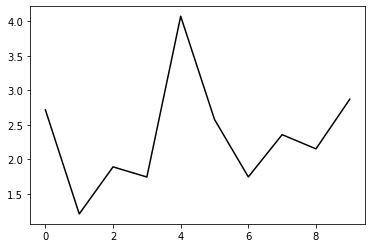

In [35]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


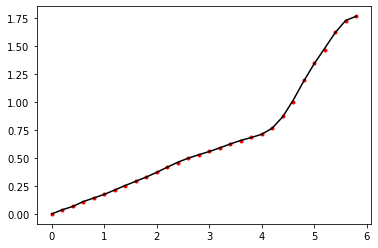

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

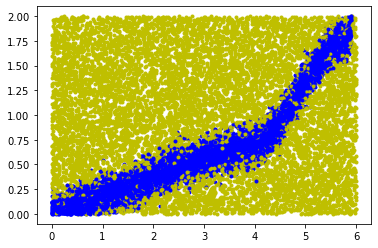

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [12]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [32]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

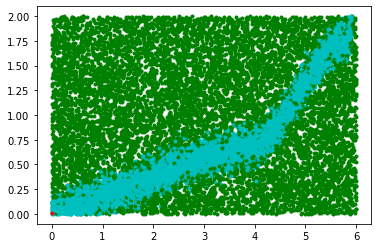

In [33]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [15]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [16]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.0681567429311962, shape=(), dtype=float64)
tf.Tensor(1.0781567428389782, shape=(), dtype=float64)
tf.Tensor(1.0963786887001687, shape=(), dtype=float64)
tf.Tensor(1.0781567428214682, shape=(), dtype=float64)
tf.Tensor(1.0882817176872615, shape=(), dtype=float64)
tf.Tensor(1.08815674277873, shape=(), dtype=float64)
tf.Tensor(1.078156745595744, shape=(), dtype=float64)
tf.Tensor(1.0581715623589765, shape=(), dtype=float64)
tf.Tensor(1.0980871693262402, shape=(), dtype=float64)
tf.Tensor(1.078157263346605, shape=(), dtype=float64)
tf.Tensor(1.0726820774518353, shape=(), dtype=float64)
tf.Tensor(1.0881534615224364, shape=(), dtype=float64)
tf.Tensor(1.0781567428279712, shape=(), dtype=float64)
tf.Tensor(1.0881579833886486, shape=(), dtype=float64)
tf.Tensor(1.097453008179789, shape=(), dtype=float64)
tf.Tensor(1.0787799591498266, shape=(), dtype=float64)
tf.Tensor(1.0880789821436734, shape=(), dtype=float64)
tf.Tensor(1.068246007524015, shape=(), dtype=float64)
tf.Tensor(1.0781

# Optimize

100 1.2023384154084222
3.2969736348331122 2.199578805031072 -0.13761803884879184 -0.2779216678146212
[2.71049554 1.21291778 1.88452333 1.74762345 4.06707494 2.58182956
 1.74898682 2.35128345 2.15554281 2.87505508]


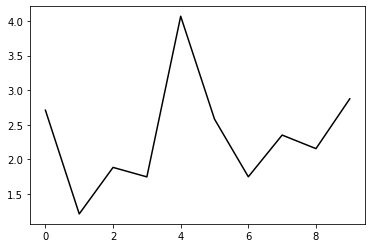

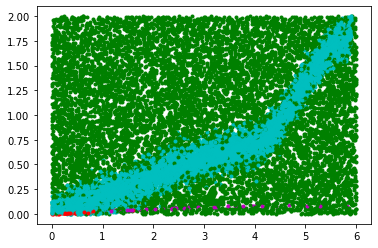

10100 1.0721440046435229
3.276055962166697 2.2215324627360307 -0.13767379644753597 -0.29410479763984726
[2.63317284 1.63404042 1.72022393 2.10872768 3.62778082 2.92010306
 2.14589127 2.1685668  2.22354038 3.36564532]


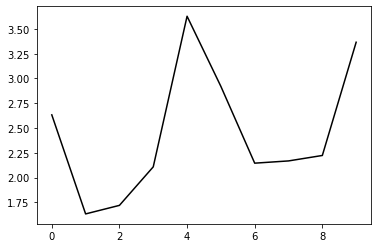

20100 1.0432916747119036
3.2621215673519757 2.2359642579484382 -0.13708636886038097 -0.30855850100938836
[2.62811516 1.94662068 1.89599771 2.27624269 3.26928498 2.98798943
 2.41849023 2.20627598 2.27638167 3.84043094]


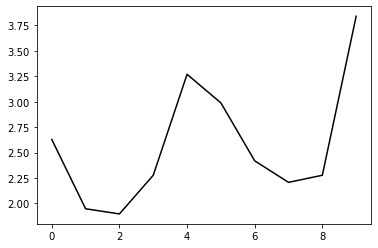

30100 1.0296876997691986
3.264235290364605 2.235869734469047 -0.1457614288565769 -0.3043933340240461
[2.56662417 2.21166158 2.16567718 2.41480846 2.99766776 2.94623477
 2.6312002  2.357845   2.36348889 4.30400795]


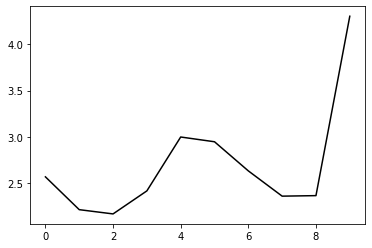

40100 1.041997704481536
3.2561813921203075 2.2426163563370825 -0.1392503422410849 -0.3132474880668391
[2.59157841 2.37624287 2.32382849 2.45435219 2.77177439 2.79553902
 2.66677977 2.44651107 2.43159187 4.75889288]


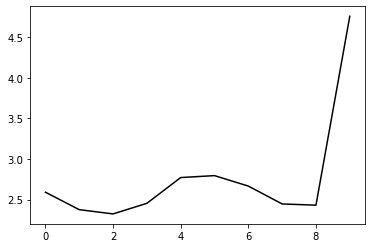

50100 0.9988647093943395
3.2472317805478332 2.252817519044348 -0.13872260131763062 -0.3205229328012005
[2.63103868 2.45988394 2.40917395 2.46062474 2.61202603 2.65364349
 2.62622413 2.51809895 2.56540534 5.20700975]


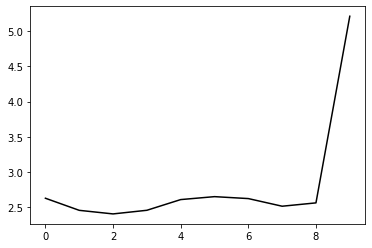

60100 1.0172833408110071
3.231969590704188 2.2676473873622016 -0.13163258007197443 -0.3338086275284261
[2.67147597 2.53622042 2.44345913 2.44112421 2.50609987 2.55182322
 2.54560554 2.48927592 2.61416148 5.64757636]


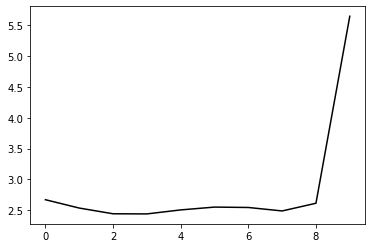

70100 0.9958177381728462
3.2463243310532834 2.2556685427597802 -0.1449675384899788 -0.31978650509274037
[2.58597648 2.59958415 2.57659987 2.56099306 2.57554413 2.60969327
 2.62849049 2.62621375 2.81720224 6.08132824]


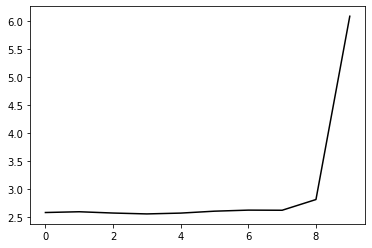

80100 1.0152876180533261
3.2349947145109 2.2661801840150813 -0.13762990524022667 -0.3304164576237376
[2.67230971 2.53276449 2.50080548 2.49037951 2.49413406 2.50763516
 2.52737536 2.56248424 2.84899557 6.50530114]


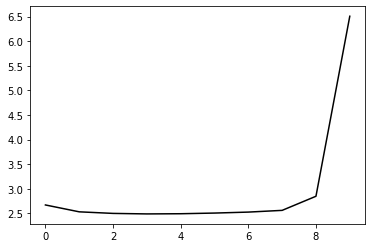

90100 0.9939481684855062
3.241082723197845 2.2619486891352563 -0.1457484676944239 -0.3235585139419996
[2.60173062 2.62478216 2.59655523 2.5734202  2.56566895 2.57147096
 2.58852614 2.63974753 2.97719562 6.91752214]


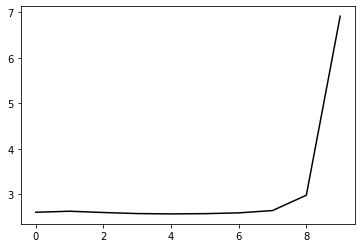

100100 0.9934611966584324
3.2426585670885193 2.2593551370359837 -0.1449888388399816 -0.3219396474409827
[2.58610066 2.62061199 2.61327571 2.5987503  2.58598768 2.58071502
 2.58951138 2.64734709 3.03516727 7.31362679]


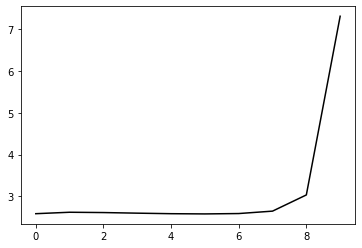

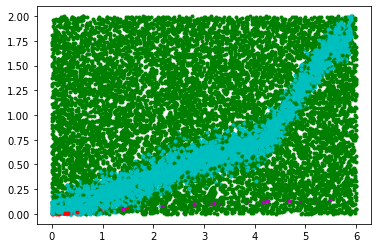

110100 1.0030026541434816
3.2420628584935525 2.2596386345907247 -0.14334805878686474 -0.3232800262415369
[2.60166604 2.58767489 2.58638654 2.58867907 2.58587989 2.58518946
 2.60216112 2.68866965 3.16002633 7.68988154]


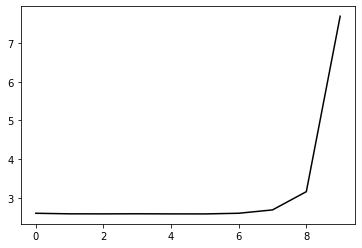

120100 1.0027260403865348
3.2430201903801423 2.2602367717277287 -0.14863990141245023 -0.3208108799903768
[2.5913804  2.59939807 2.59916593 2.59858168 2.59833311 2.60121983
 2.62191424 2.72093249 3.2510805  8.03821658]


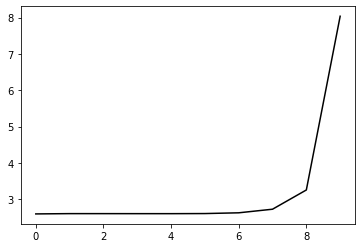

130100 1.0025636115440044
3.2438901037271473 2.2569313672307034 -0.14126860137733527 -0.32265885396819577
[2.59629025 2.5881915  2.59038926 2.59046656 2.59001815 2.59475021
 2.62086144 2.73652573 3.32936078 8.34575234]


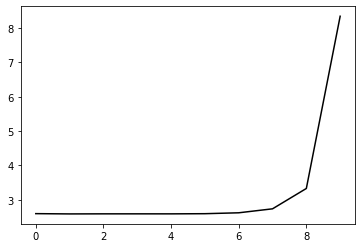

140100 0.9812414045169074
3.2442487976000423 2.257182415405611 -0.14387973139795104 -0.32131279595901013
[2.58855995 2.6039746  2.59823453 2.59649751 2.59726098 2.60353911
 2.63263317 2.75734165 3.38685222 8.59168451]


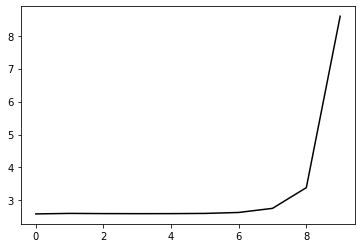

150100 1.0027299832597987
3.2388858344767906 2.262063712653072 -0.13931224413333046 -0.3269759105468608
[2.63282572 2.57338081 2.55631902 2.55302936 2.55396622 2.56244218
 2.5972712  2.73825136 3.42270778 8.75753134]


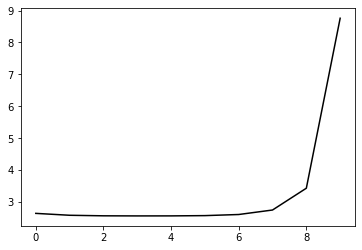

160100 1.0026875946975893
3.2330157249748073 2.2681838585010095 -0.13606932209938333 -0.33275694184069393
[2.66319546 2.59476981 2.54718125 2.52988587 2.52881268 2.54276301
 2.59188176 2.76620133 3.52726043 8.83698133]


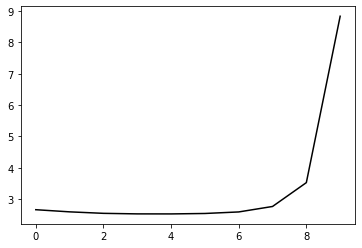

170100 1.0024612307546819
3.2337361660495163 2.270047633895211 -0.14466926255930487 -0.3292088370105448
[2.6432981  2.6247219  2.59482754 2.5704794  2.55986044 2.56886483
 2.61773922 2.79634154 3.57363503 8.86843435]


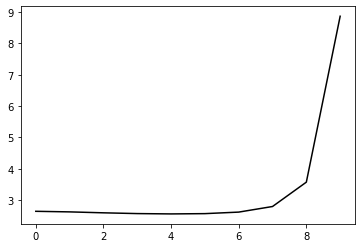

180100 1.0024062631402118
3.2367772697571477 2.2690535299656243 -0.15007372699837296 -0.3261057379641556
[2.61565518 2.64918408 2.63987539 2.62201507 2.61374448 2.62719294
 2.68968487 2.89945969 3.72816908 8.89279131]


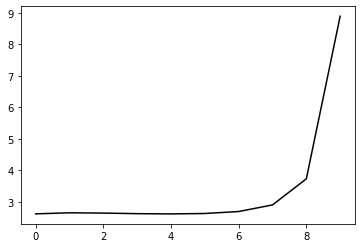

190100 1.0024624108654394
3.242160589757308 2.265303258018434 -0.15714129340242353 -0.3196034121223766
[2.57441228 2.62862742 2.66284885 2.66989915 2.66954841 2.68400679
 2.74727581 2.96181526 3.80151791 8.90762711]


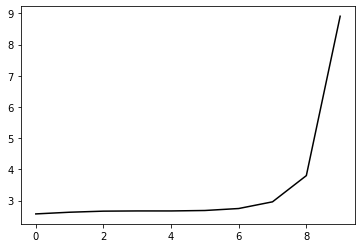

200100 1.0025453786943113
3.246835213090118 2.259100641994183 -0.15613205562787202 -0.3165169701260252
[2.54401249 2.6117632  2.65904799 2.68580713 2.70114462 2.72276175
 2.78704707 3.00097375 3.84117536 8.9165553 ]


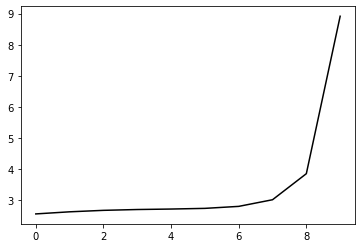

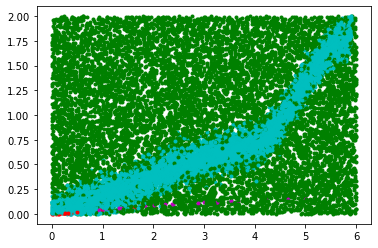

210100 1.0026807123050543
3.248647732582111 2.2563364590140074 -0.1566478398345522 -0.3139353050979583
[2.51573986 2.60392112 2.64832751 2.68138537 2.70597311 2.73195117
 2.79022515 2.98492842 3.79565593 8.90831564]


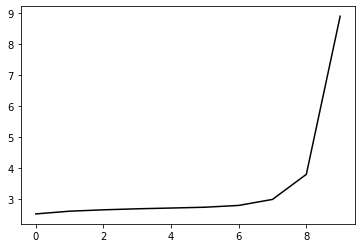

220100 1.0027960005496452
3.2393230524638974 2.2647653284523988 -0.15015455823909496 -0.32324501034247505
[2.62576854 2.52383194 2.52015599 2.54593354 2.57669159 2.61467631
 2.68806834 2.90451313 3.75867879 8.9039488 ]


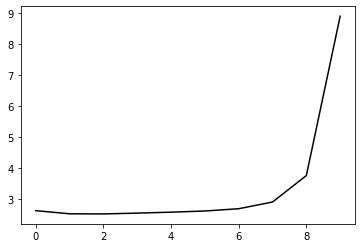

230100 1.0026011165239275
3.2415680767261277 2.263780597653602 -0.153228008314289 -0.32089546906767163
[2.5921727  2.60864373 2.58417706 2.58315025 2.60573396 2.64922282
 2.73676158 2.97414292 3.85238745 8.9190021 ]


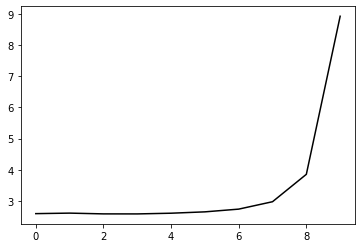

240100 1.012414596822005
3.24049809192404 2.2640134642768226 -0.15017982326105261 -0.32303794354022064
[2.61976032 2.57770869 2.56761694 2.56772578 2.58277578 2.62371432
 2.71909732 2.97565417 3.88434793 8.92477445]


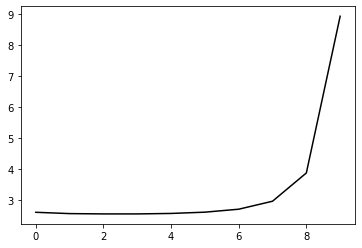

250100 1.0024071680305335
3.240113062487983 2.262464519071212 -0.14585092060396157 -0.32415907824297624
[2.6220413  2.59167585 2.57206287 2.56435418 2.57052518 2.5992319
 2.67946427 2.91561582 3.79559932 8.90930483]


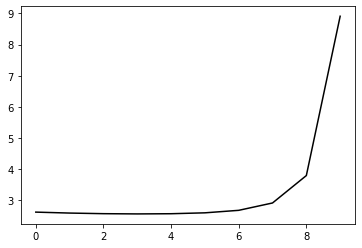

260100 1.002798477648588
3.233228305961399 2.2684125677961955 -0.1398086633826865 -0.3315348411083591
[2.69066831 2.60593334 2.54239318 2.51221219 2.50991582 2.5384528
 2.62665495 2.88509961 3.80913426 8.9109301 ]


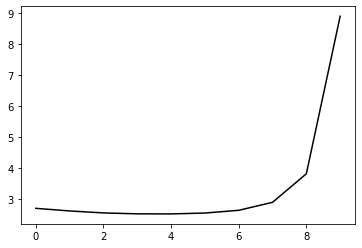

270100 1.0024207098028557
3.234813776039991 2.2680579950397703 -0.1424957403462099 -0.3301574069099724
[2.66080029 2.65169274 2.61050343 2.57566521 2.56497527 2.59081072
 2.6850207  2.96012946 3.90623364 8.93066429]


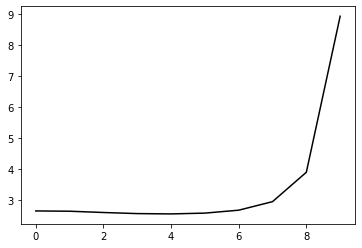

280100 1.0023348223041968
3.238036226312844 2.2660027052772183 -0.14646906424616835 -0.3266865399651353
[2.63306222 2.64688027 2.64433468 2.62738372 2.61796196 2.63884704
 2.72808886 2.99886019 3.9350983  8.93085733]


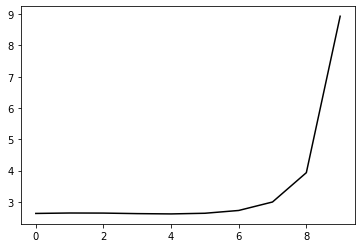

290100 0.9925698285648663
3.242032072339473 2.261049815034507 -0.14620914078221925 -0.3239972136641418
[2.60950375 2.63771014 2.65778562 2.65720241 2.65568445 2.67670198
 2.76177963 3.02765056 3.9584014  8.93772978]


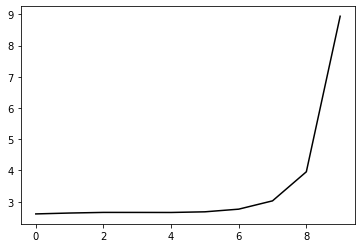

300100 1.0023377131484439
3.2446421635670673 2.2578311896514554 -0.14620013415044175 -0.3221161166702814
[2.59348333 2.61801241 2.64943205 2.66786056 2.68098069 2.70903448
 2.79435951 3.05623163 3.98136934 8.94118201]


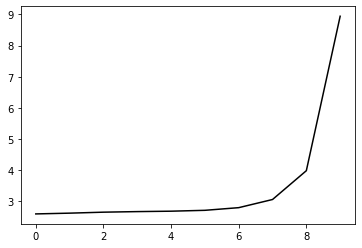

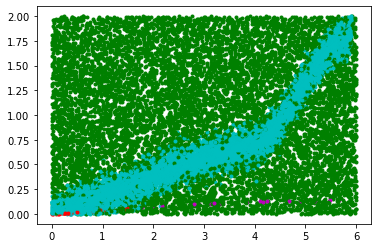

310100 1.0027470497865045
3.2494046359403 2.2523208469349734 -0.14681207394978577 -0.31887831909205416
[2.54922229 2.65741295 2.68552724 2.70392542 2.72579416 2.76366958
 2.85545669 3.11975014 4.04384452 8.94979879]


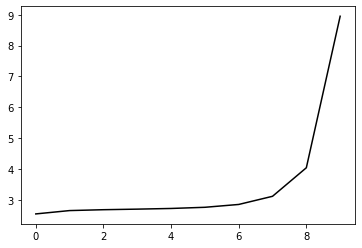

320100 1.0025868373222206
3.2521132607161976 2.2538742962307845 -0.15908461220982412 -0.3119966069451771
[2.53149436 2.5820401  2.67099504 2.71599402 2.74678414 2.78878891
 2.8809797  3.13936922 4.05359805 8.95562366]


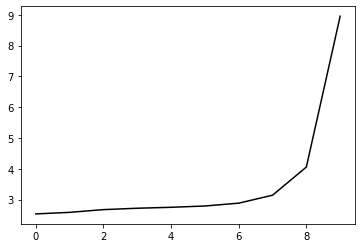

330100 1.002389714018667
3.2471299649767777 2.2583401076089955 -0.15392561115403533 -0.31792203833161825
[2.55490319 2.57414579 2.62496942 2.67365542 2.71523266 2.76494156
 2.86282254 3.12679109 4.04907558 8.95510515]


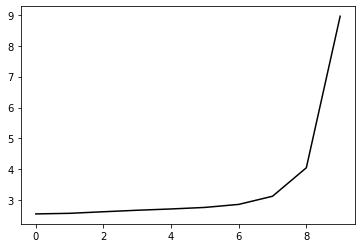

340100 1.0024374953119313
3.2465190228640046 2.259607154141934 -0.15597201771514438 -0.3175155696655097
[2.54048036 2.58976056 2.62922412 2.67152268 2.71628773 2.77209663
 2.87348264 3.13462132 4.0401059  8.95156162]


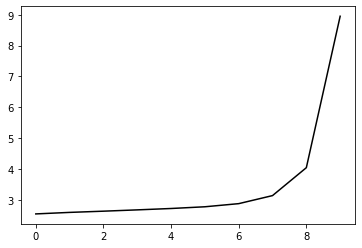

350100 1.0023672776139714
3.2446983643070606 2.262710910209731 -0.15930474530981176 -0.31755978133361223
[2.5511703  2.5701642  2.60562775 2.64781578 2.69407873 2.75380827
 2.85881788 3.11882808 4.01591435 8.94994685]


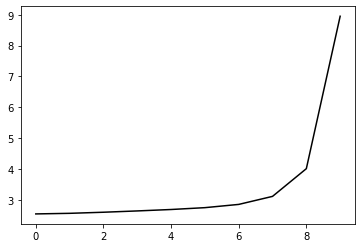

360100 1.0027177432700742
3.252400975720724 2.2559262649971767 -0.16581421394974502 -0.309378346067852
[2.49066028 2.59056323 2.65281493 2.7002258  2.74878923 2.81230339
 2.92247324 3.18647211 4.07775453 8.95734409]


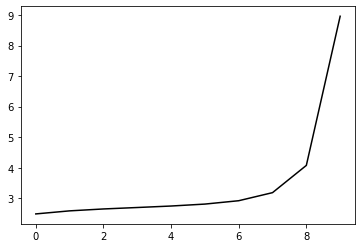

370100 0.9931810917510895
3.2565070052531024 2.2509571602288294 -0.16568021240931208 -0.306173820521213
[2.45749354 2.5982408  2.66041572 2.713341   2.76580199 2.83117974
 2.94218563 3.20442191 4.08609448 8.96068649]


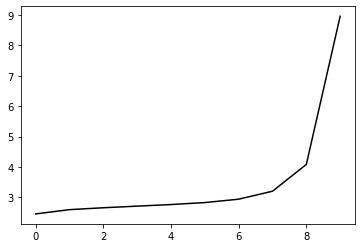

380100 0.9924189025297194
3.249297118071769 2.2586804537826 -0.16361835774316927 -0.3121764744980784
[2.52891118 2.52057984 2.56922152 2.62437997 2.68006448 2.74721504
 2.85780178 3.11702515 3.99773399 8.9454774 ]


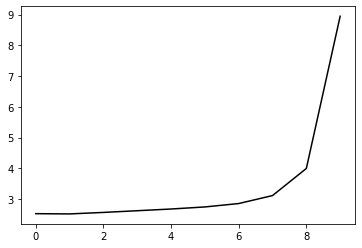

390100 1.002473099593956
3.249298018664648 2.257537615537954 -0.1601645195737081 -0.3132920014057941
[2.54916853 2.50505853 2.53980681 2.58810321 2.64388469 2.71466749
 2.83075723 3.09866189 3.99600545 8.94439979]


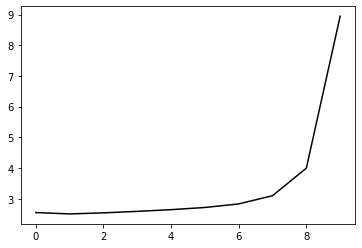

400100 1.002510137623284
3.24442798043271 2.264006182336908 -0.16312673183860688 -0.3160519230304185
[2.57277545 2.51241785 2.52110489 2.55586953 2.60759921 2.6800577
 2.80150008 3.07866324 3.99349206 8.94550088]


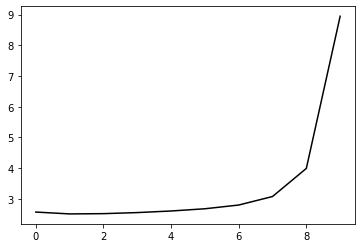

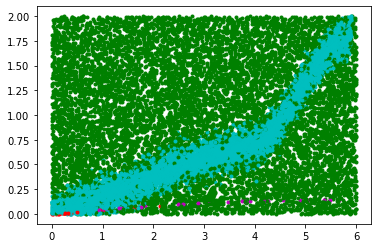

410100 0.9923354387776898
3.244675034618684 2.2651503812397578 -0.1671649919886779 -0.31492573011120933
[2.54725846 2.55534514 2.56223078 2.58688363 2.6332222  2.70776097
 2.83905616 3.13512712 4.07485113 8.96034531]


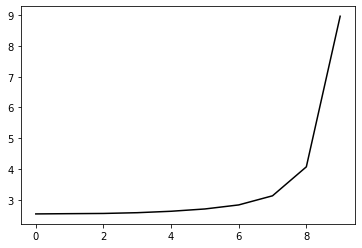

420100 0.9825246429859945
3.2415929206538956 2.2663442111786263 -0.1592232283478743 -0.32011091601425967
[2.59740933 2.53373464 2.52087627 2.53438655 2.57226322 2.64216278
 2.7747555  3.08085472 4.04695241 8.95141503]


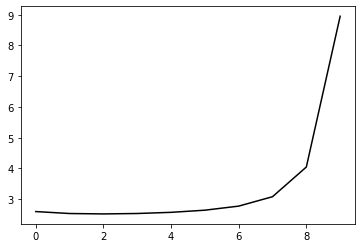

430100 1.002195442788016
3.2405791892854725 2.2664274903696926 -0.15581885397963685 -0.32180000171799134
[2.59269153 2.58619012 2.55215411 2.54549167 2.56941226 2.62907253
 2.75316173 3.04951655 4.00089195 8.94292558]


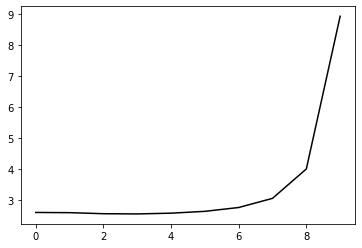

440100 1.002489726094636
3.2383671811765256 2.269150996274826 -0.15611049305094918 -0.3236709714477711
[2.61951336 2.56154276 2.54361718 2.53807888 2.5561042  2.61179604
 2.73794617 3.0464127  4.02420063 8.94737494]


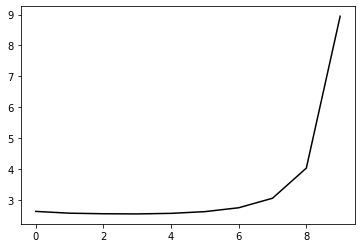

450100 1.0125290586785305
3.2361602248081294 2.2728403355137994 -0.16085394355801716 -0.32362803010653723
[2.62671525 2.56123624 2.54398464 2.54150455 2.55643852 2.60482623
 2.72223794 3.02070404 3.98422794 8.94322452]


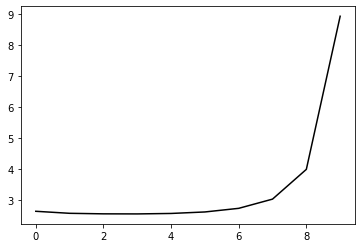

460100 1.0023719432057077
3.235665834801695 2.2741249277323883 -0.1618102448184034 -0.32416089679070914
[2.61692857 2.60047183 2.56964964 2.56318085 2.57863968 2.62819615
 2.74941251 3.0602426  4.05114379 8.95217457]


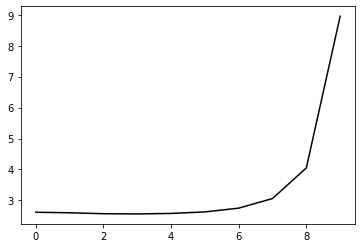

470100 1.0024418718002837
3.2426211720241085 2.2679169587393844 -0.1650252852929299 -0.31711320328908216
[2.56947359 2.62900237 2.62759213 2.62241677 2.63530858 2.68178203
 2.79839434 3.10078595 4.06934068 8.95941735]


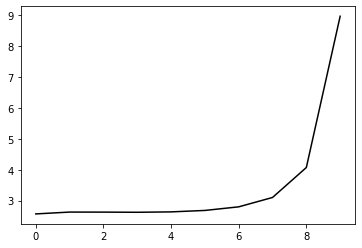

480100 0.9823435120865787
3.242924336900329 2.2672642170049246 -0.16454610758756147 -0.3165241731077648
[2.57008708 2.59896527 2.61661392 2.62454272 2.63805821 2.67796951
 2.78298338 3.0668618  4.00734667 8.94755485]


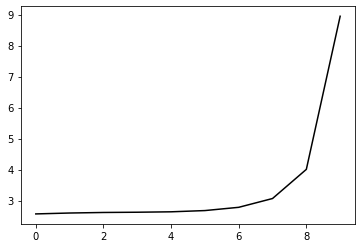

490100 0.9929766164412641
3.2361067570714233 2.2735092068813305 -0.16128220595510492 -0.32362540244706356
[2.65681866 2.5343908  2.52492503 2.53667146 2.55767323 2.60215192
 2.71084345 3.00556046 3.98517098 8.94300084]


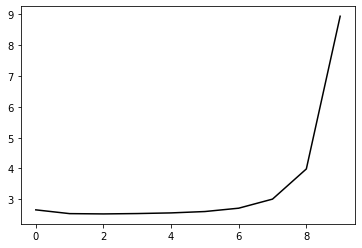

500100 1.0025975423002713
3.2350959059722486 2.2758006623751394 -0.1657210857268352 -0.32334147199219176
[2.65214475 2.57563795 2.54823264 2.54827525 2.56904437 2.61793367
 2.73236774 3.0349369  4.02315543 8.94986596]


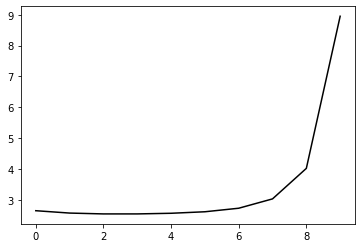

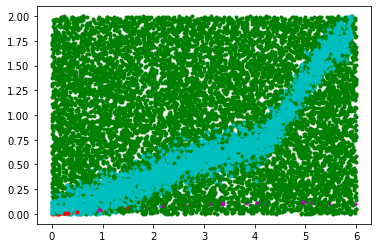

510100 1.0032193327898637
3.234870839157436 2.2763352940926556 -0.16669173624851427 -0.3233119013438359
[2.64875671 2.60033198 2.57305457 2.56504555 2.57937046 2.62641651
 2.7412136  3.04274581 4.02435039 8.95118778]


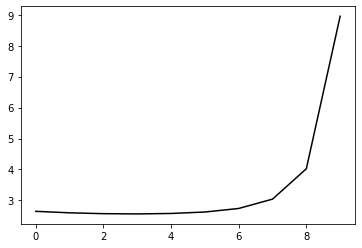

520100 1.0024945955271538
3.234624439687709 2.275166332635243 -0.16181382936361147 -0.32509349307097546
[2.65530109 2.59553637 2.57420301 2.56754329 2.57541216 2.61367742
 2.719282   3.00969119 3.98056059 8.94282199]


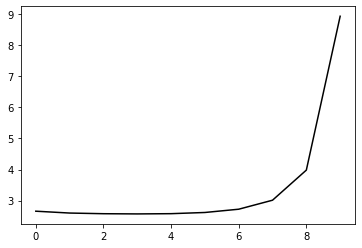

530100 1.0023504079392183
3.2358620079602174 2.2738683051536643 -0.1621109272067377 -0.3237531806344254
[2.62302783 2.64429178 2.62458474 2.61055419 2.61316079 2.64500124
 2.74108496 3.01564267 3.95766244 8.93760861]


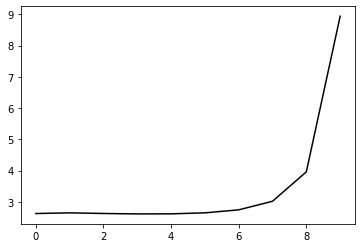

540100 1.012287646398661
3.236146048913491 2.2730854778636327 -0.16142711237660531 -0.32312726103174333
[2.62761021 2.61302198 2.60769533 2.60866498 2.61408567 2.63890151
 2.72073627 2.97356549 3.88765367 8.9241295 ]


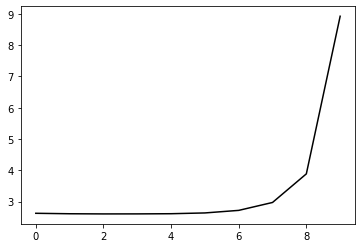

550100 1.0025889039890499
3.235535473381618 2.2731254415979945 -0.16004238165824916 -0.32365363000433933
[2.65196405 2.57451818 2.57288397 2.5791114  2.58792302 2.61255391
 2.68843276 2.93009264 3.83330524 8.91769703]


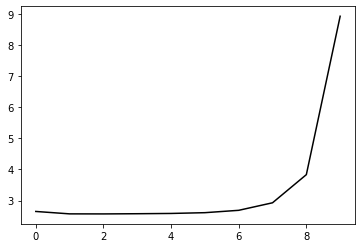

560100 1.0023479287194277
3.235431179249895 2.2729592536882013 -0.15934487343589526 -0.32376130372487866
[2.63640353 2.63006899 2.61216511 2.60093607 2.60461509 2.63086895
 2.70950405 2.9511062  3.84682274 8.91828591]


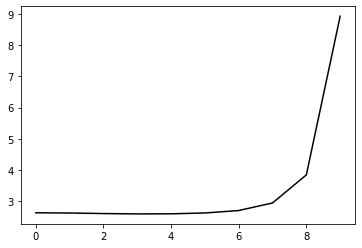

570100 0.982661283328874
3.2302132666242938 2.281584325742751 -0.171285468255719 -0.32388658551193245
[2.65948335 2.58704132 2.5910053  2.59572248 2.6040792  2.63205416
 2.71358132 2.96035393 3.87010176 8.92686144]


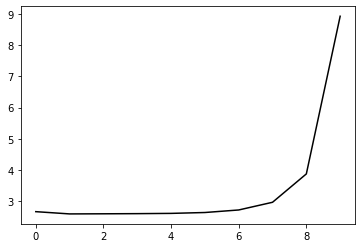

580100 0.9930428189130434
3.225877764935338 2.286390539087257 -0.1733093712107162 -0.3267328414154693
[2.70135401 2.57206649 2.55115565 2.5499968  2.55898228 2.58723572
 2.66829894 2.91561626 3.83335918 8.91682258]


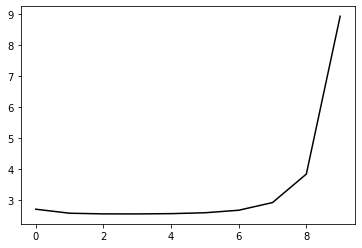

590100 1.0023226027571228
3.2330818542835034 2.2791123958320405 -0.1712451755756092 -0.32197575068920353
[2.6403605  2.63526344 2.62484453 2.61974931 2.6284073  2.65997657
 2.74703344 3.00349878 3.92562607 8.93195441]


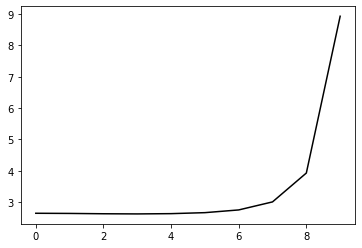

600100 1.0118826780526997
3.236234948674711 2.2747557427527267 -0.1648536435018914 -0.3217111215681129
[2.62187224 2.64281904 2.6447908  2.64197243 2.64913092 2.67960756
 2.76651198 3.02234297 3.94025037 8.93433678]


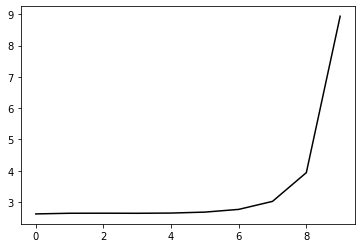

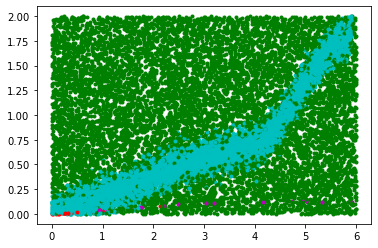

610100 1.0024017721771468
3.2304968608393736 2.2809350660335066 -0.16738035910480903 -0.3264008130839179
[2.66073076 2.6148559  2.60775141 2.60896239 2.61962623 2.65350886
 2.74643221 3.01456429 3.95692957 8.93479608]


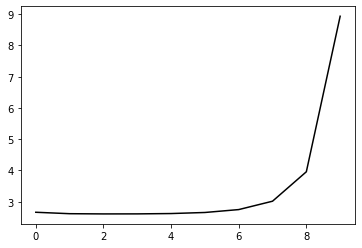

620100 1.005739325145893
3.2231292390754507 2.2894276992184404 -0.17407560022053623 -0.33117383919616217
[2.71039294 2.59830728 2.56722488 2.56411533 2.57654807 2.61415119
 2.71311724 2.99309403 3.96008827 8.94084163]


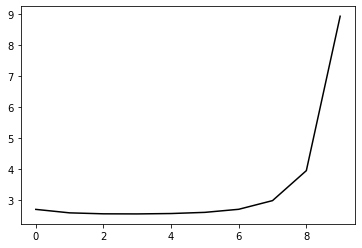

630100 1.0023054493324857
3.2283437075254926 2.2854145959601455 -0.17780203093836636 -0.3248229402418924
[2.65673025 2.64932594 2.63743368 2.63190943 2.6422512  2.68001185
 2.77939704 3.05628108 4.00142197 8.94466428]


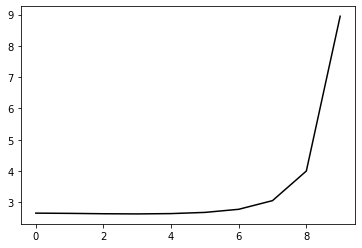

640100 0.9923594447934541
3.2270699583679896 2.28716750927355 -0.1802099285612474 -0.32511922019389783
[2.67010708 2.63251234 2.62761823 2.62701115 2.63756402 2.67439332
 2.77349577 3.05077024 3.99820969 8.94505669]


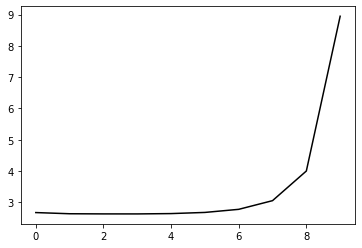

650100 1.0131315852248977
3.2178040983751552 2.2968711198174643 -0.18508658590966076 -0.3321487731882959
[2.74433239 2.60932065 2.56433975 2.55498449 2.5647334  2.60153226
 2.70086776 2.98091595 3.94518601 8.93470298]


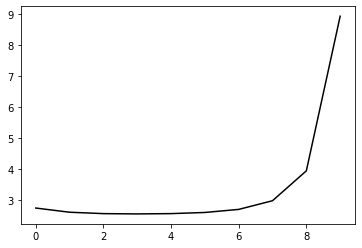

660100 0.9826176046807984
3.217542593134906 2.297596250886713 -0.1867128036291718 -0.33192133151124925
[2.73227835 2.66647756 2.6055659  2.57957178 2.58285619 2.61865832
 2.71916457 3.00148335 3.96333354 8.93668758]


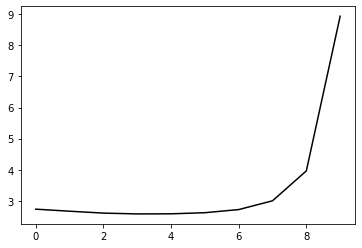

670100 1.0025530300920484
3.218763790704262 2.2960453332347175 -0.18479648834199724 -0.3315312620144322
[2.73278504 2.66808371 2.62737093 2.60046201 2.59514016 2.62469473
 2.72264024 3.00406381 3.96284845 8.93889029]


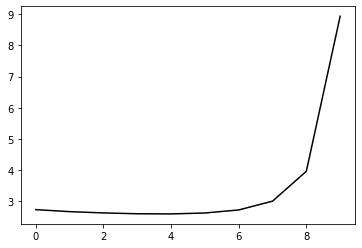

680100 1.0158939609180002
3.2159639117562673 2.29911098161039 -0.1869799883263714 -0.33344199856521417
[2.76385628 2.65798421 2.61761589 2.59376342 2.5864721  2.61145201
 2.70572486 2.98668377 3.95364554 8.93493168]


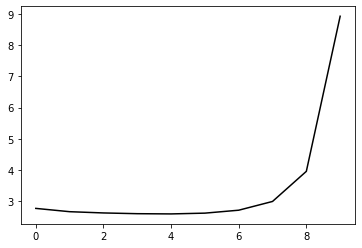

690100 1.0015661731588883
3.217734086723031 2.2980867166454053 -0.18957136710260417 -0.33037896142318773
[2.73069651 2.71148815 2.67043175 2.64127643 2.63130776 2.65213201
 2.73912024 3.00698384 3.94428594 8.93669223]


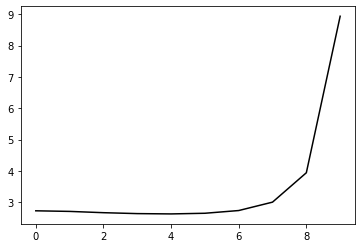

700100 1.0031001712245329
3.210213658353729 2.3050965827141576 -0.1907562202379606 -0.3369742139387628
[2.80383024 2.6828816  2.6140093  2.57678552 2.56147838 2.57612153
 2.65415471 2.90840451 3.83294029 8.91610685]


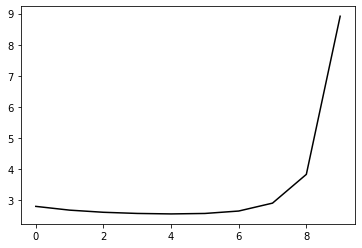

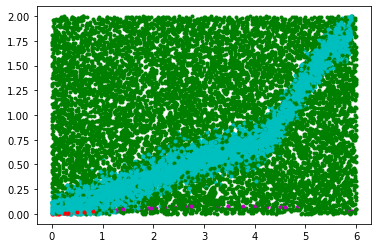

710100 1.0024152868388185
3.2178031922162793 2.2969575723081577 -0.1836884882954192 -0.33278371255932654
[2.74493827 2.7459171  2.69683913 2.65408816 2.63448978 2.64776764
 2.72653506 2.98415259 3.91017425 8.9290742 ]


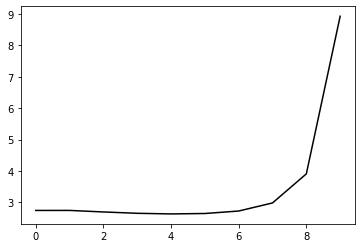

720100 0.9823367007840939
3.219673575504921 2.2955505494173103 -0.18502171586343863 -0.3301142235943644
[2.72995705 2.74126474 2.72077628 2.68826426 2.6680222  2.67853264
 2.75488868 3.01044441 3.9338013  8.9334397 ]


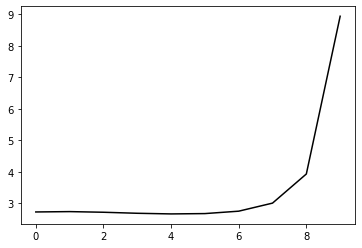

730100 0.9725474151160308
3.221434443044062 2.2929864301842966 -0.1802270926872774 -0.3306887062507004
[2.71193564 2.74767682 2.73767163 2.71838925 2.70445541 2.71593075
 2.79283168 3.05245312 3.98510263 8.94515459]


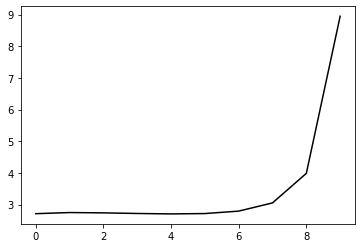

740100 1.002549982444268
3.2169595448871435 2.2963368282814107 -0.17770451253464284 -0.3362698040802056
[2.77660041 2.70646471 2.6733549  2.65510755 2.64476471 2.65503222
 2.72418568 2.96936454 3.88741266 8.92947927]


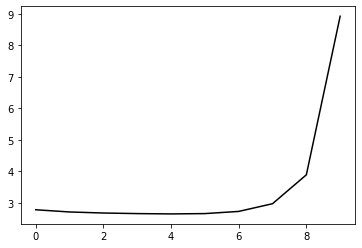

750100 0.9923915686275342
3.2163282458884708 2.29744053800411 -0.18015442186843647 -0.3357073492412829
[2.76998231 2.7490018  2.70663064 2.67606005 2.66253537 2.67295886
 2.73943787 2.9751118  3.8745488  8.92156642]


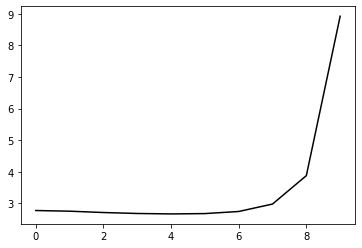

760100 1.002338108236819
3.2167769434698985 2.297010109914108 -0.18084538505814313 -0.3342507436161581
[2.74896829 2.76532417 2.74468617 2.71748032 2.69899447 2.70208719
 2.75768094 2.9723001  3.83541776 8.91835966]


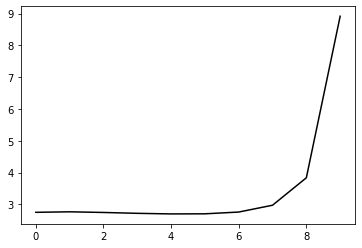

770100 1.0022295033651523
3.2227128477841807 2.291329118931774 -0.17929095250280822 -0.32854103439650284
[2.67369659 2.75676807 2.7982332  2.80136077 2.79255547 2.79601195
 2.84782193 3.05532632 3.90279865 8.93051398]


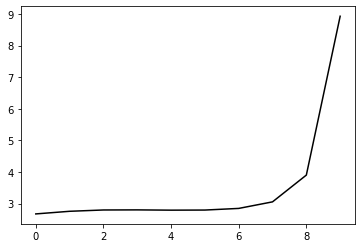

780100 1.0022654280427292
3.2193455039066623 2.2937923084506733 -0.1768521747411282 -0.33354679918858704
[2.7103224  2.71810885 2.73941866 2.75338005 2.75770548 2.76877185
 2.82447269 3.03699233 3.89646216 8.92697307]


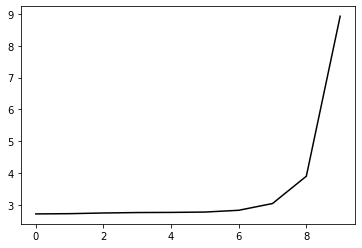

790100 0.99221619937459
3.217912364366003 2.2950359382071173 -0.1775576685467052 -0.33419266115249124
[2.72601858 2.71676319 2.71694132 2.72266873 2.73082616 2.7475608
 2.80299593 3.00541347 3.84503885 8.91486929]


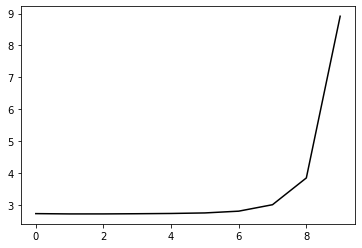

800100 1.0025066332792758
3.2238787714796118 2.289083085783135 -0.17467651688813304 -0.3287497142598931
[2.65548587 2.73096917 2.77315068 2.79160667 2.80442103 2.82700232
 2.88972076 3.09687156 3.92905253 8.93252566]


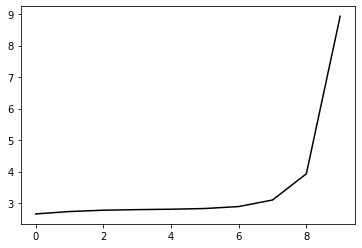

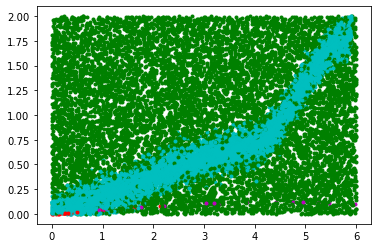

810100 1.0046818590033768
3.227218119431032 2.2847512431837185 -0.1678520443763921 -0.32803615323264185
[2.64133951 2.73894357 2.76791349 2.79112892 2.81197653 2.84074125
 2.90908765 3.12250364 3.95987808 8.93678346]


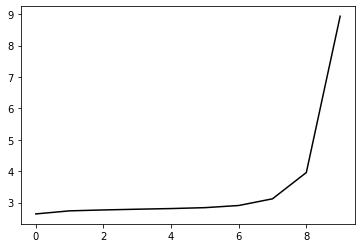

820100 0.9823851847866166
3.226614482759427 2.2846764801283057 -0.16437004584107334 -0.33025513097618486
[2.65913871 2.70376764 2.73993931 2.76659636 2.79122332 2.82557373
 2.90124648 3.12588771 3.98349925 8.94234161]


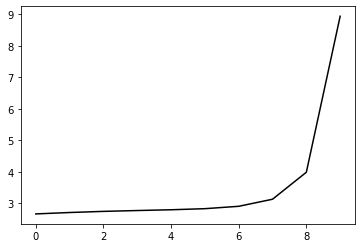

830100 0.9836140751853761
3.2354411110149166 2.2788933340350037 -0.17657206099369843 -0.31521906360840063
[2.55981017 2.73565128 2.81839287 2.86039326 2.89267172 2.93270812
 3.01242413 3.23640763 4.07526892 8.95956536]


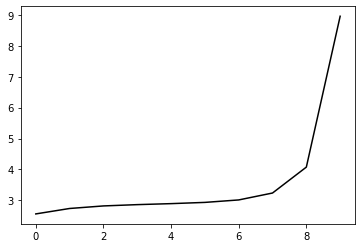

840100 1.0023967658433466
3.226439730367018 2.286618985156674 -0.17236585847389635 -0.3273792772585677
[2.64561688 2.63011218 2.69424348 2.75269045 2.79814399 2.84847189
 2.9409045  3.18798967 4.0801515  8.96057584]


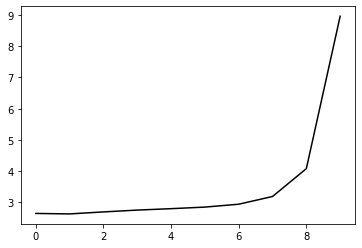

850100 0.9925435043492271
3.2244945163460055 2.288781011261073 -0.17456652549415583 -0.3283237533212812
[2.68061811 2.60800074 2.64430746 2.69233526 2.7423966  2.80105869
 2.90024725 3.15167022 4.04786954 8.95516355]


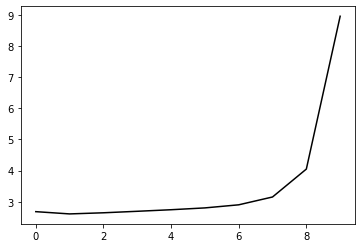

860100 1.017557635517885
3.2235738335372157 2.288780386344988 -0.1697226397819911 -0.3314170358629536
[2.6762214  2.65881913 2.65986166 2.68457247 2.7284855  2.79267909
 2.90503737 3.17624663 4.08960228 8.96055988]


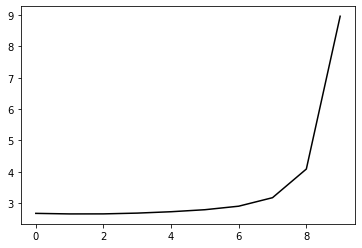

870100 1.0123668173060796
3.2202171985789327 2.2928840880882833 -0.1741737464036086 -0.3335740125724203
[2.69606084 2.64741332 2.651633   2.6731659  2.71177813 2.77749109
 2.90088317 3.19210866 4.13244058 8.9684846 ]


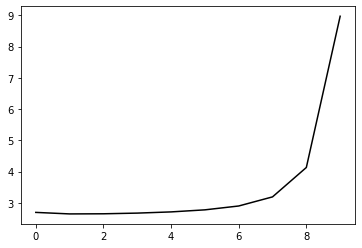

880100 1.002297749727211
3.221066789849895 2.292531922484226 -0.17594376014426333 -0.33218918628827876
[2.66265968 2.69962499 2.69773236 2.71178554 2.74607598 2.81037374
 2.93652448 3.23426999 4.1762758  8.97700378]


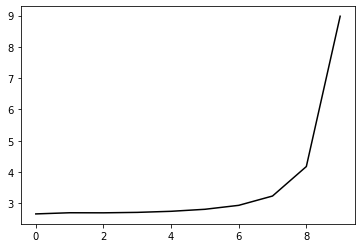

890100 1.0022777357305825
3.2245055750160763 2.2891601846553145 -0.17551144982816916 -0.32858167169498215
[2.65160918 2.66581799 2.69710337 2.7227757  2.75481669 2.81258761
 2.93140101 3.21991761 4.14619257 8.96823725]


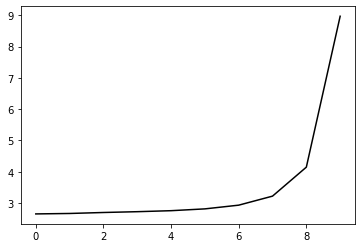

900100 1.0036724516363082
3.2371215850887807 2.2781814572078765 -0.18056197508174818 -0.3131329835654448
[2.53119304 2.71226668 2.79488761 2.8348345  2.87113255 2.92618007
 3.03598936 3.30653786 4.19476344 8.97833476]


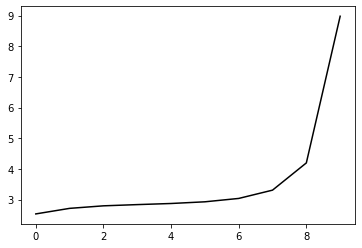

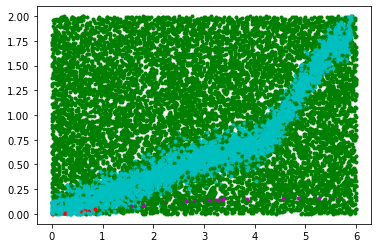

910100 1.0027748093826963
3.2362047795722306 2.279592029717911 -0.18379923439294532 -0.31228950594296334
[2.54702653 2.6292603  2.72208329 2.79162555 2.84593901 2.90677659
 3.01402701 3.27640959 4.15452159 8.96987593]


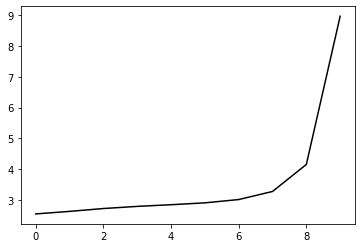

920100 0.9946258656993456
3.230611815263745 2.285657558257261 -0.18623491413443613 -0.31765374189405876
[2.59279527 2.60383687 2.6578434  2.72340761 2.78830614 2.8615689
 2.97988818 3.2574003  4.17312713 8.97767099]


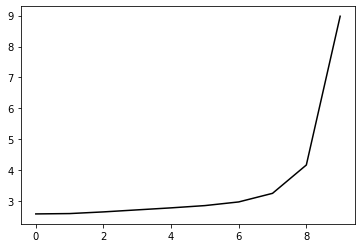

930100 1.0025497297439305
3.2354594468336204 2.2795099994094596 -0.17869163192532686 -0.31538953210201975
[2.56402679 2.63753101 2.68084587 2.73429513 2.79572775 2.86942508
 2.98632218 3.25455882 4.14020009 8.97102435]


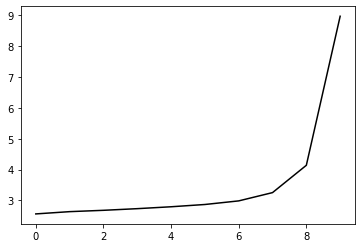

940100 1.0026805583853873
3.2374436707037977 2.2765113429657475 -0.1735294402600785 -0.31507411088029297
[2.54821354 2.64247875 2.68738874 2.73518546 2.79214223 2.86584238
 2.98498888 3.25391099 4.13583339 8.96664981]


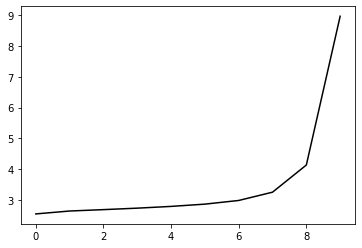

950100 1.003931300570425
3.247383613515783 2.2678275482856587 -0.17952264297897935 -0.30226177589365
[2.46481075 2.65725591 2.74678311 2.80539892 2.86250351 2.93484541
 3.05233241 3.31491894 4.17554713 8.97714375]


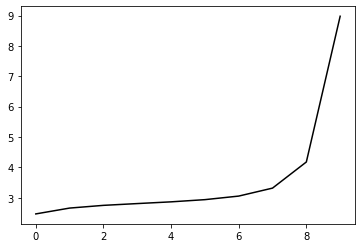

960100 0.9942293446612394
3.242655740281485 2.2721381151574964 -0.1775384131777649 -0.3077315526704723
[2.50353816 2.59059468 2.67412192 2.74639051 2.8114485  2.88675439
 3.00607358 3.27140123 4.13918737 8.97180176]


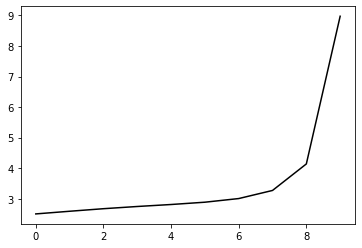

970100 1.0027758996411962
3.23587622060599 2.2770537802305655 -0.1694807055475222 -0.31665443166287816
[2.60494677 2.50991527 2.54449486 2.60624334 2.67268557 2.74975352
 2.86876161 3.1357899  4.02747384 8.95017753]


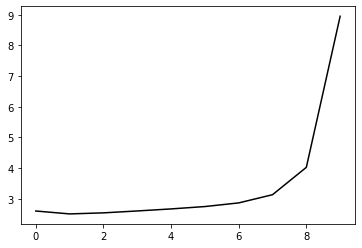

980100 1.0023401317020122
3.2385133196770544 2.2740345439614638 -0.16641629481197595 -0.3151253738777646
[2.56810925 2.58980967 2.59568935 2.63061606 2.68839236 2.76652924
 2.88992884 3.16190164 4.05101324 8.95648927]


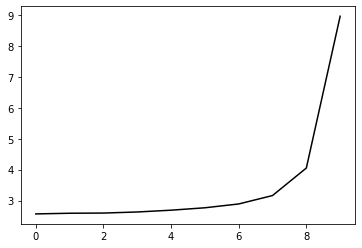

990100 1.002542341733394
3.239110798587668 2.2740527377954503 -0.16985325067379986 -0.31312111596489417
[2.53896872 2.61748066 2.63333948 2.6604809  2.70696756 2.77917761
 2.90161628 3.17240813 4.05284095 8.95623581]


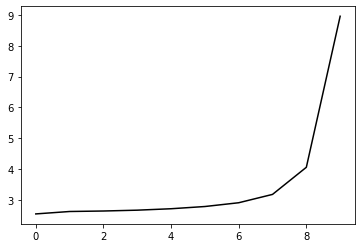

In [36]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (9):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (1):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print((j+1)*100, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.9925372778351147
3.2356166286650048 2.2790849685247268 -0.16861436178476705 -0.3141503262277409
[2.52761561 2.57861708 2.63284252 2.66892032 2.71200087 2.77807092
 2.89571948 3.16586145 4.12626225 8.99262086]


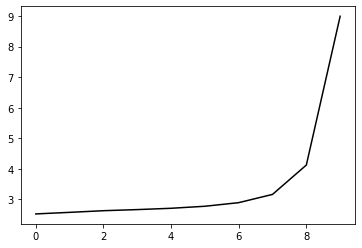

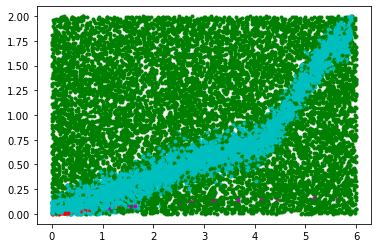

1000 0.9948996151593288
3.292313366118589 2.201352427133201 -0.19851177155450045 -0.26550142562538626
[2.38617038 2.48313949 2.56999748 2.63106378 2.66906046 2.70082528
 2.76521525 2.96678756 3.77713551 8.90539599]


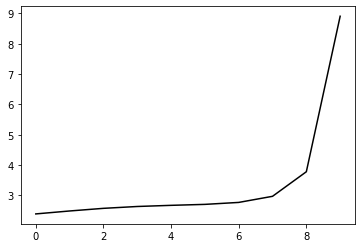

2000 0.9983911039621571
3.3076923941906005 2.186449257731354 -0.2099973278029729 -0.2315964712565326
[2.09148215 2.2751613  2.37493236 2.42897484 2.45718328 2.4382759
 2.35041429 2.22053025 2.5063871  8.66683649]


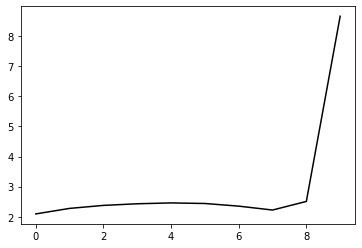

3000 1.0515193332289663
3.396217108088978 2.110713252818393 -0.33170113041566346 -0.13823318679720278
[1.21709478 2.23823921 2.71823463 2.96455877 3.08584056 3.10543305
 3.02116553 2.85351305 3.0189813  8.7693273 ]


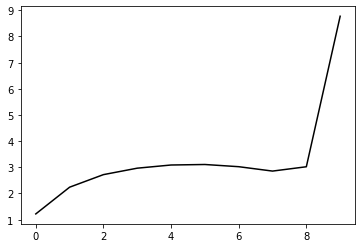

4000 1.042129341459932
3.392750556059248 2.1138004802056627 -0.33392407799195084 -0.1401996756220252
[1.76097138 1.30290256 1.06673658 0.96547712 0.93500499 0.98932017
 1.18496912 1.67829971 3.06676667 8.79374668]


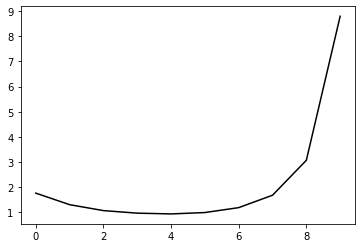

5000 0.9991819921292346
3.385298468467383 2.1064143690838084 -0.30121640335685435 -0.1489056603171876
[1.69819123 1.68174353 1.47524619 1.16700794 0.86216323 0.60083074
 0.38142326 0.23613988 0.68170403 8.36278507]


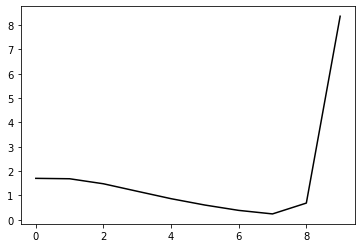

6000 0.9804293663062232
3.3762160068818092 2.1170036346588565 -0.2950925531455526 -0.1644775117667772
[1.74305996 1.52471405 1.48580427 1.35134318 1.13526036 0.84234348
 0.48089803 0.11718579 0.36954316 8.29442386]


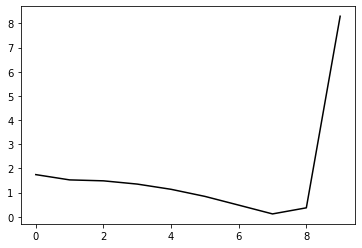

7000 0.873890967140649
3.3424066813274798 2.12741622694548 -0.2621274781513384 -0.17043143541876155
[ 1.82182259  1.67337913  1.33888415  0.95054295  0.47982498 -0.13673087
 -0.98975063 -2.12384853 -2.82654933  7.76093669]


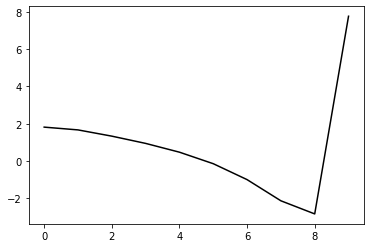

8000 0.5461523354637875
3.2852445270567707 2.0806076012176096 -0.18746766689252284 -0.11587028152809278
[ 1.7198236   1.32339952  0.80051116  0.14792515 -0.69317315 -1.81264281
 -3.34656518 -5.42692493 -7.22909089  6.9816667 ]


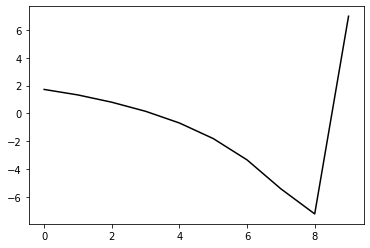

9000 0.40454541457285714
3.255983107936654 2.062508682263688 -0.1445250329171986 -0.10387206056496247
[ 1.67407511  1.43761883  1.03893347  0.49894781 -0.24326267 -1.29324765
 -2.85286906 -5.27818204 -8.18947146  6.82588528]


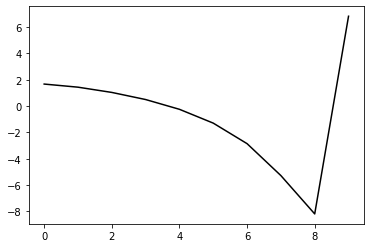

10000 0.3693555200545666
3.2325477621610585 2.044043085452475 -0.12250869629292523 -0.09769877235113007
[ 1.62318691  1.4117396   1.11684455  0.7011244   0.09534582 -0.82114851
 -2.2823598  -4.76313831 -8.60987515  6.71414442]


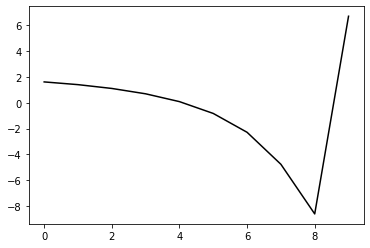

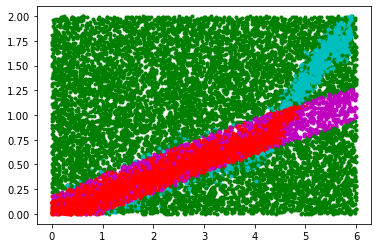

11000 0.33857992717526114
3.2051026733813424 2.023377610739815 -0.10316740179592936 -0.09505495882505786
[ 1.60248979  1.3696309   1.15075851  0.83078045  0.33741748 -0.44348473
 -1.75378095 -4.16058615 -8.82711449  6.68520478]


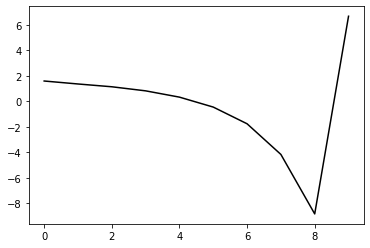

12000 0.33166251728823387
3.188333666541844 2.0038563701022993 -0.09281868104304028 -0.09489139164494506
[ 1.50470583  1.3888879   1.22672482  0.97380215  0.56767008 -0.10349631
 -1.28663928 -3.60783414 -8.83238803  6.67839502]


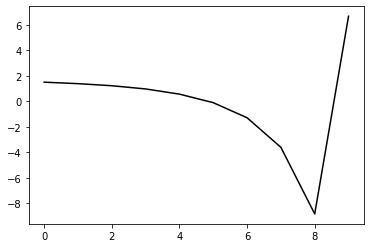

13000 0.40971162293204993
3.1629840403792975 1.9489388750316121 -0.08509559008859792 -0.09215116359643126
[ 1.45186798  1.34087807  1.18824663  0.94905203  0.55912133 -0.08362789
 -1.21633673 -3.48926001 -9.07105925  6.61812033]


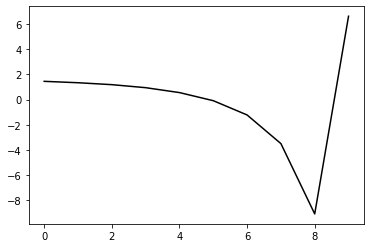

14000 0.3742015831887147
3.1420182931575025 1.909648653429873 -0.08221218161635735 -0.09540762527087378
[ 1.47725923  1.29911679  1.13490359  0.91166982  0.56095559 -0.02513431
 -1.09509098 -3.33448082 -9.05404331  6.62838675]


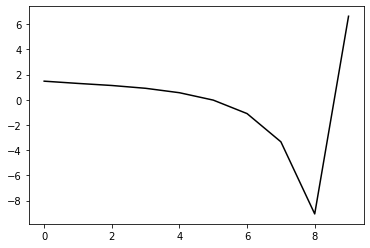

15000 0.32757927820685867
3.111351751023584 1.8602337450328907 -0.0805161681462535 -0.09339287527374876
[ 1.44413807e+00  1.26788681e+00  1.12967804e+00  9.17878300e-01
  5.76902628e-01  6.73101860e-03 -1.03886011e+00 -3.25486538e+00
 -9.04319538e+00  6.64157036e+00]


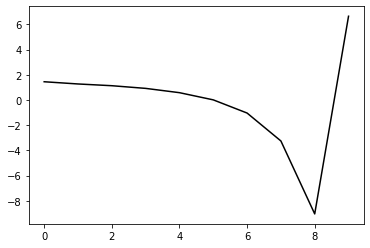

16000 0.4276734759966241
3.084134919425672 1.8106206570189711 -0.08264058766281618 -0.08899072329465714
[ 1.39089759  1.31578887  1.17453079  0.9641683   0.63219009  0.07444798
 -0.95460854 -3.15252527 -8.96107234  6.64131694]


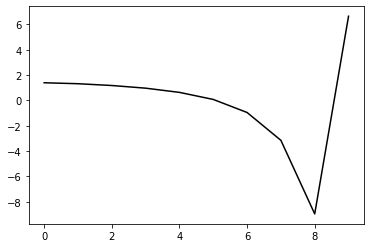

17000 0.5567239198344205
3.0534618040875006 1.6827735153151302 -0.07759759820966186 -0.08367050399015478
[ 1.38235549  1.22059301  1.07270362  0.85038102  0.50368238 -0.07190487
 -1.12299824 -3.34482217 -9.19005365  6.63526957]


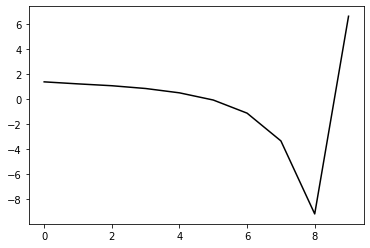

18000 0.4023022516060077
3.045004234691297 1.5670579932754358 -0.07278435151043998 -0.09209459148539974
[ 1.36764167  1.23857077  1.12509623  0.93746401  0.63455574  0.10921068
 -0.88791807 -3.05724509 -8.87605718  6.6671667 ]


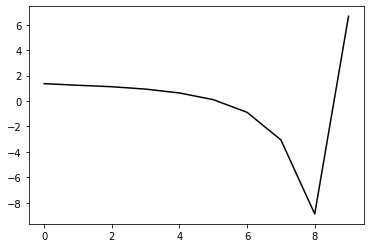

19000 0.4595555160302527
3.005107283905301 1.448132734410488 -0.07483511715586692 -0.08333492819265136
[ 1.320323    1.17727891  1.01103594  0.78181433  0.432159   -0.13968945
 -1.17883142 -3.38272524 -9.21771059  6.6196377 ]


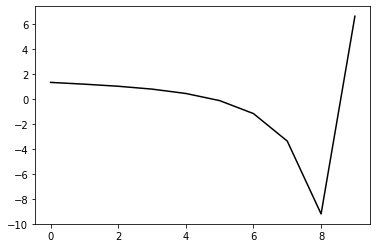

20000 0.40162579833494094
2.9814187568148456 1.2571657606264035 -0.07242395172658193 -0.08124576251864915
[ 1.26064061  1.18242673  1.03616566  0.81993751  0.47546599 -0.09863852
 -1.14670145 -3.36539975 -9.26526259  6.61123173]


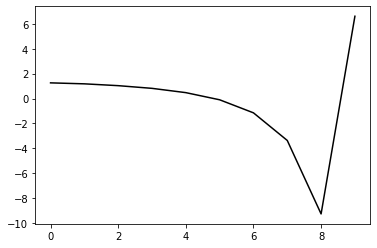

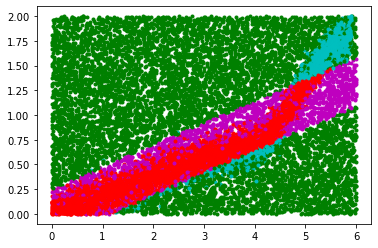

21000 0.40482655005043855
2.968753219232319 1.1528237581443703 -0.07564021261881711 -0.08144938882239244
[ 1.24786627  1.09280538  0.9829222   0.78345898  0.46297852 -0.08069262
 -1.09439614 -3.28366465 -9.17996695  6.61283579]


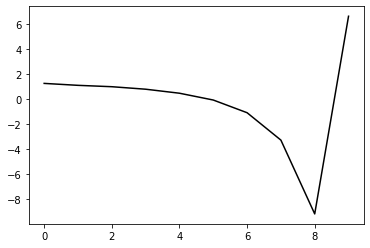

22000 0.45316482608765274
2.931380785442198 1.0285482380414996 -0.07524461221477083 -0.07546583943857568
[ 1.20759886  1.00579038  0.86726096  0.66027234  0.34050683 -0.19513135
 -1.1923957  -3.35585918 -9.18409257  6.61765121]


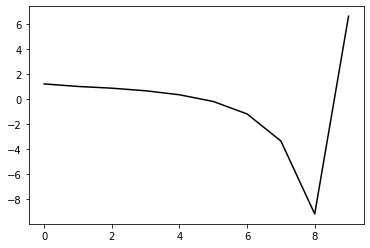

23000 0.4943317506283701
2.923598920471672 0.9139486919524287 -0.06448382441443423 -0.09812557242449979
[ 1.1994203   1.15598955  1.04153063  0.8735881   0.59268203  0.08944248
 -0.88287383 -3.01366569 -8.79777272  6.67258671]


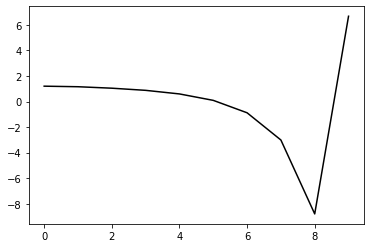

24000 0.7443116515629938
2.8989024449266942 0.8050005632274831 -0.08191793068321447 -0.07933988510631032
[ 1.15295404  1.0857735   0.99955649  0.79711183  0.47023658 -0.07705854
 -1.08413971 -3.23827695 -8.94759324  6.66328231]


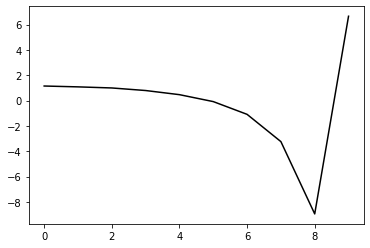

25000 0.3791014799688201
2.8739346288022296 0.729284836183653 -0.07025375784906177 -0.10266632265620863
[ 1.18558513  1.16330522  1.05489464  0.87864887  0.58305742  0.06091114
 -0.92640448 -3.05393965 -8.7109959   6.71542656]


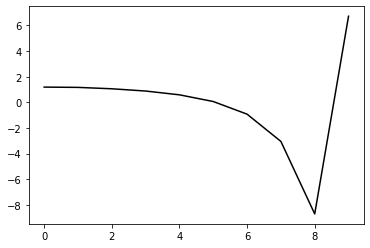

26000 0.44850095550716473
2.8299888346198747 0.6175363850350324 -0.06991152943089846 -0.10182536151608731
[ 1.2394124   1.09615896  0.95562493  0.75925088  0.44013085 -0.10431313
 -1.10867662 -3.24723012 -8.86892797  6.63081876]


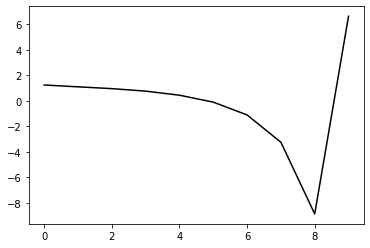

27000 0.46810060892924044
2.7977291942143734 0.527217621302786 -0.06895090250927538 -0.1027748295362044
[ 1.25694725  1.04127413  0.92170552  0.72466976  0.39936251 -0.15061846
 -1.1612517  -3.30252313 -8.86481959  6.64759041]


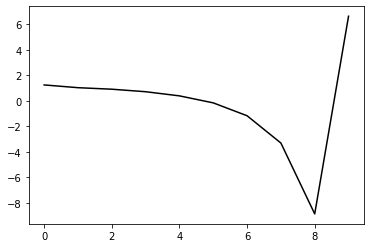

28000 0.44391522506889924
2.7816898834771178 0.4612595982792172 -0.07431170319903331 -0.10173380358953166
[ 1.20149722  1.10746671  0.98615191  0.79507173  0.48440154 -0.04654569
 -1.03799171 -3.15923161 -8.63831907  6.71566272]


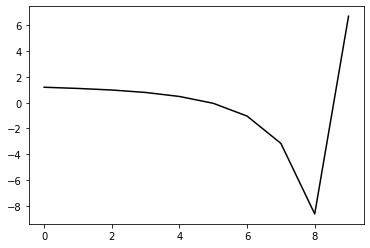

29000 0.41260513069782295
2.7289932156794796 0.3452499844055165 -0.0742894030728334 -0.08993147877910881
[ 1.22557499  1.01329471  0.84853492  0.61849401  0.26895158 -0.30116288
 -1.32876005 -3.47575033 -8.93885318  6.58478886]


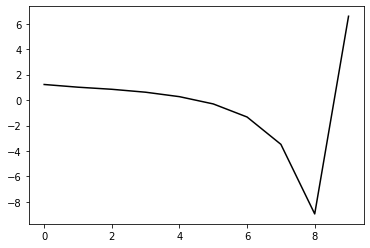

30000 0.39488170051163196
2.7055368061236162 0.2508909908292061 -0.07091258965307999 -0.10265508188842982
[ 1.26380027  1.03564866  0.90253465  0.70214719  0.37892414 -0.16960924
 -1.18357812 -3.32490074 -8.76427936  6.66576602]


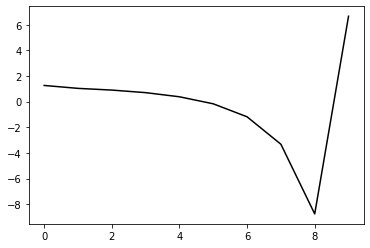

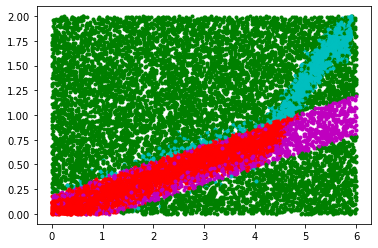

31000 0.36315795770841297
2.6747249412849787 0.14356943847284034 -0.07755027297627276 -0.09751507684938679
[ 1.22924977  1.07274732  0.91883734  0.69896416  0.35663386 -0.21064412
 -1.23808002 -3.38300657 -8.82138834  6.70676667]


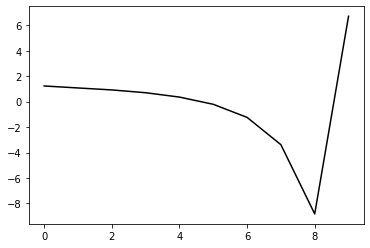

32000 0.32616797703568684
2.6419834062460206 0.06642114328442342 -0.07346187147950939 -0.10395256429701936
[ 1.27073579  1.05580532  0.9082728   0.70965004  0.38616575 -0.16402156
 -1.18016227 -3.3236736  -8.73069833  6.69524491]


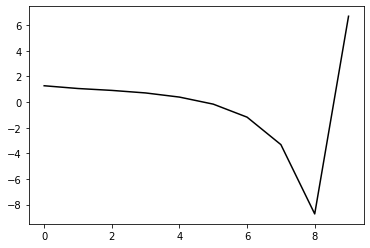

33000 0.4574176466949107
2.620443509019371 0.01279799486684186 -0.07650655065970263 -0.10577559650536936
[ 1.25359584  1.13962352  1.01182773  0.81220243  0.49626941 -0.03516366
 -1.0201789  -3.11628037 -8.444704    6.73346089]


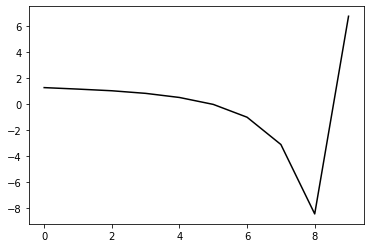

34000 0.40363562750817117
2.5951652592007153 -0.04081627579283223 -0.07741413670667441 -0.10830814144691331
[ 1.2103268   1.20898398  1.08962283  0.90522419  0.60241382  0.07577617
 -0.9113873  -3.00649558 -8.27375597  6.79493677]


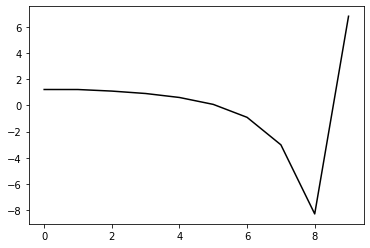

35000 0.43335912472888
2.554954413411857 -0.13698592540966054 -0.07860179552522165 -0.10536136158861159
[ 1.24871414  1.12223031  0.98362407  0.78654143  0.46727329 -0.07780823
 -1.08153414 -3.18323445 -8.38785149  6.77175678]


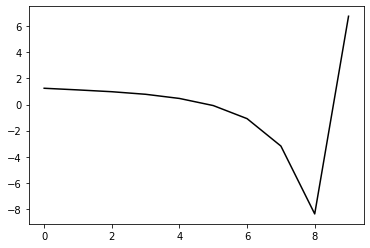

36000 0.4750103766854145
2.511860104182408 -0.2601958852202561 -0.08357758938698029 -0.09492682513245763
[ 1.23534898  1.09686245  0.94408932  0.71083905  0.35411034 -0.22461307
 -1.26088082 -3.39192868 -8.57883399  6.72355499]


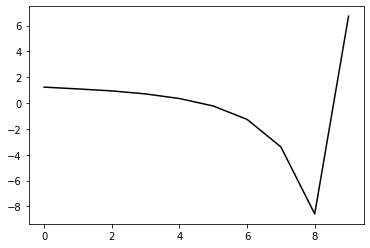

37000 0.4353578960489023
2.4914183709237623 -0.3855229411692828 -0.08314899624202782 -0.09991950589845677
[ 1.28655727  1.04872988  0.93518834  0.73376253  0.40658901 -0.14721169
 -1.16414091 -3.28055071 -8.42909822  6.76107777]


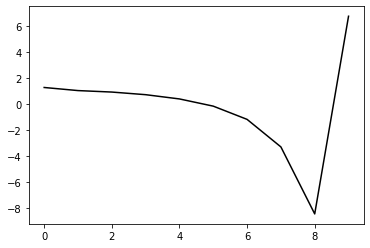

38000 0.3687223726441766
2.4574184311863996 -0.5875363468924341 -0.08689162181575351 -0.09621065025482195
[ 1.26722912  1.16030791  1.0222281   0.80302182  0.45849935 -0.10934412
 -1.13238598 -3.24038814 -8.36096411  6.76179973]


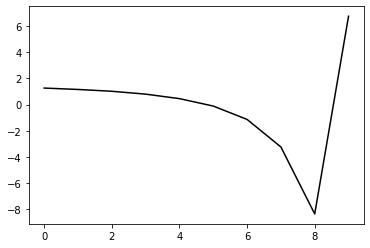

39000 0.40264750477763006
2.416687483431331 -0.6736713740784205 -0.08285270974949024 -0.0987108978551672
[ 1.35116089  1.15011575  0.99049316  0.77359026  0.4369767  -0.11600659
 -1.11379481 -3.18084752 -8.23147686  6.80507188]


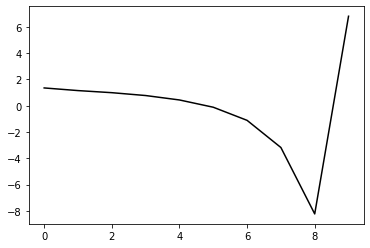

40000 0.35100260107612163
2.3944569115826897 -0.6610520163855398 -0.08288212746454866 -0.10417092251876253
[ 1.35032588  1.21546332  1.07888489  0.87463561  0.54418374 -0.00933136
 -1.01060339 -3.06246423 -7.99014267  6.78789098]


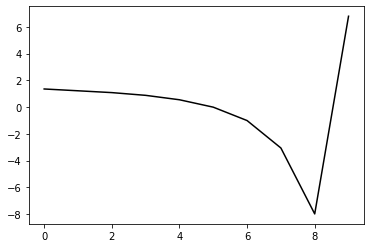

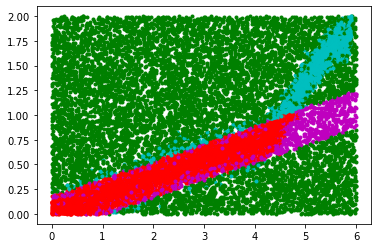

41000 0.29011547920377473
2.3552180235570943 -0.7360388717944643 -0.0910629146105274 -0.09280151424934575
[ 1.40666055  1.18146745  1.0274655   0.79690109  0.44142601 -0.1217865
 -1.11047817 -3.14590258 -8.07028541  6.82293949]


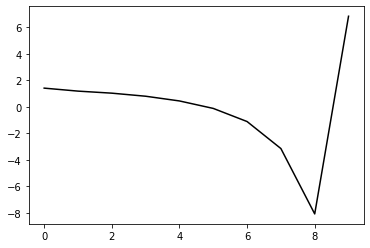

42000 0.3567482025054227
2.286186274199341 -0.8766314225091523 -0.09971124157556764 -0.08375665411202426
[ 1.44877366  1.23098946  1.03046259  0.75029887  0.3504887  -0.26642352
 -1.32431258 -3.42190436 -8.3586537   6.79942334]


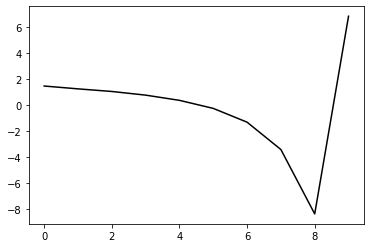

43000 0.3796004633517384
2.23761576434876 -0.9822069113151292 -0.10928330904167022 -0.08952320908578168
[ 1.53201036  1.37959163  1.17352672  0.91299755  0.54534184 -0.01983266
 -0.99546755 -2.98662528 -7.84337101  6.87654338]


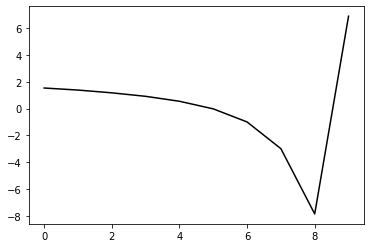

44000 0.44504242730621746
2.1684818783603212 -1.0870047370189562 -0.12621164633659984 -0.08696151770871437
[ 1.65623997  1.45435457  1.22037541  0.93631667  0.56129571  0.00820202
 -0.93157096 -2.85233015 -7.59800742  6.94582943]


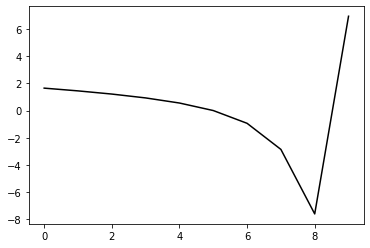

45000 0.2591242410829141
2.0358408148242693 -1.2872702758746815 -0.16526242547085082 -0.08946013073324957
[ 1.92758203  1.62879764  1.32346175  1.01506994  0.66440598  0.18911431
 -0.60993197 -2.32647974 -6.84118827  7.05143998]


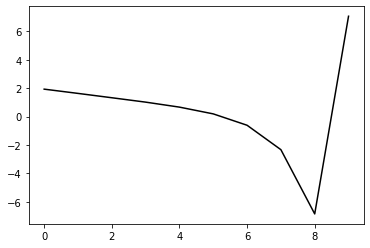

46000 0.2061623667653316
1.9943638977750298 -1.3049674600652752 -0.1734847368152018 -0.08795518146496137
[ 2.1207298   1.84897091  1.59456545  1.26684632  0.84734105  0.28372317
 -0.57780563 -2.24909834 -6.37323623  7.13050555]


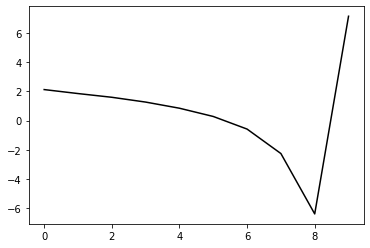

47000 0.2266779535655973
1.976462359515061 -1.2906508741273837 -0.16758295948700797 -0.08225637214390297
[ 2.16203342  1.96572657  1.74299136  1.43228955  1.00357604  0.38611209
 -0.5814765  -2.34114522 -6.20029129  7.11216697]


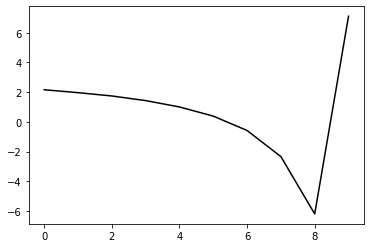

48000 0.2655949347655381
1.9278433734982614 -1.3070427970960206 -0.1778434760983329 -0.07606138641043146
[ 2.19993961  2.03831854  1.84709043  1.57482199  1.17831451  0.57328681
 -0.42207059 -2.24557451 -5.9498415   7.18923558]


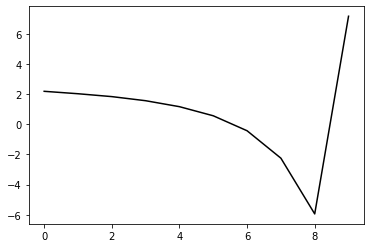

49000 0.3046624947057524
1.908864512886371 -1.2822308737245105 -0.16368664166097496 -0.07563284489171031
[ 2.22655728  2.08671211  1.88296064  1.59642455  1.1886969   0.57301354
 -0.43838532 -2.28368185 -5.865562    7.20452666]


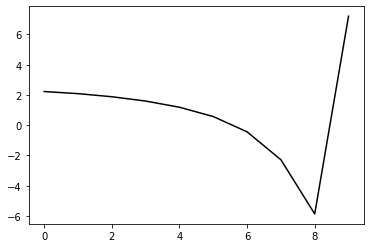

50000 0.2770748538781338
1.8819079653594353 -1.2760693749468115 -0.16133585059007224 -0.07376877396636577
[ 2.22238089  2.13480462  1.96036351  1.69923859  1.31141217  0.70982736
 -0.29604359 -2.13989804 -5.61450014  7.25644844]


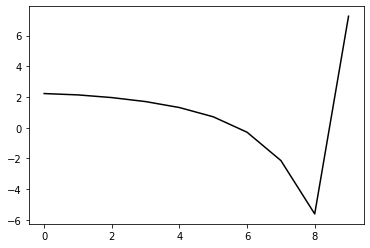

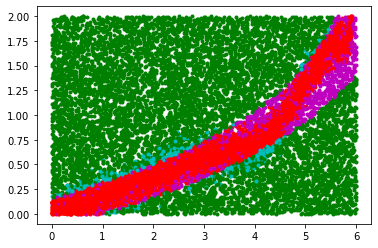

51000 0.30047127427768383
1.8321118451061227 -1.280828743226412 -0.16198870394908335 -0.07220873996929751
[ 2.24882161  2.18199689  2.00175714  1.74325871  1.36526793  0.77835892
 -0.2130652  -2.04639472 -5.4359125   7.28772885]


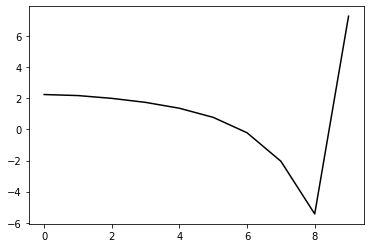

52000 0.19062031431299692
1.8036254194720127 -1.2688298140868772 -0.1552518652215554 -0.06694418465997758
[ 2.2705093   2.1528702   1.99088665  1.74502188  1.37023777  0.78186217
 -0.21135288 -2.04355669 -5.37559114  7.28285517]


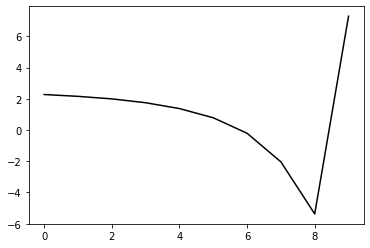

53000 0.23064133199732306
1.771257020286272 -1.2663590081469474 -0.1554783134767176 -0.06663202032938804
[ 2.22572468  2.21951577  2.08200696  1.84513665  1.48026597  0.9041824
 -0.08003029 -1.90654478 -5.19208808  7.31649874]


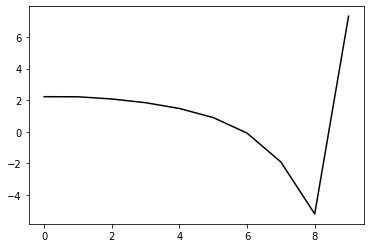

54000 0.16734358960113138
1.7189670857576465 -1.2695675896362641 -0.15661392606615313 -0.06095427507161121
[ 2.28997955  2.17258011  2.01639772  1.77284437  1.40614535  0.82889295
 -0.15283536 -1.96834258 -5.18962078  7.33659061]


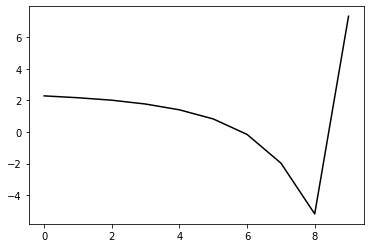

55000 0.2259809953387916
1.676230334163285 -1.2668048898060493 -0.15424124419866936 -0.06569926297948961
[ 2.26765429  2.21531438  2.07012412  1.83059114  1.46057941  0.87937078
 -0.09847792 -1.89177511 -5.03985329  7.36665671]


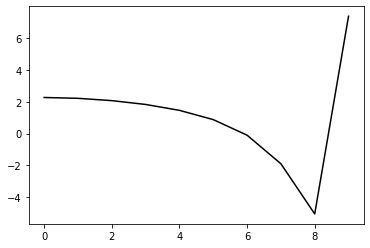

56000 0.26194537635361165
1.6412047873350886 -1.2568213911724857 -0.14968014406343683 -0.0643644329937618
[ 2.27860925  2.19856757  2.05293142  1.82181833  1.47300586  0.91940115
 -0.03667728 -1.80968279 -4.90695527  7.37776889]


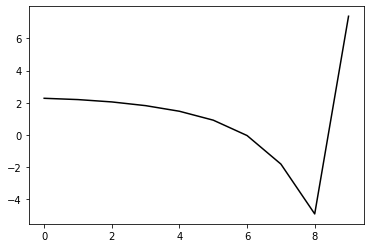

57000 0.20959669161754696
1.5895840722059946 -1.2557642529017288 -0.14912119749493205 -0.06202475379903619
[ 2.27068172  2.21338136  2.06455144  1.83201915  1.48868715  0.94570731
  0.0086228  -1.73890233 -4.79449876  7.40998789]


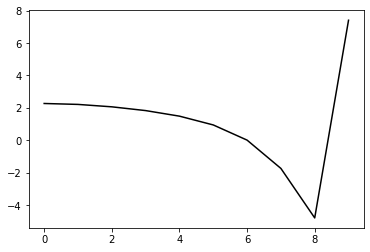

58000 0.2131566868490654
1.5467715610267827 -1.2507215176025612 -0.14492567768054412 -0.06249049116355119
[ 2.27359238  2.18711222  2.04536173  1.82614533  1.48877346  0.94899261
  0.02217564 -1.69945869 -4.69682961  7.4157252 ]


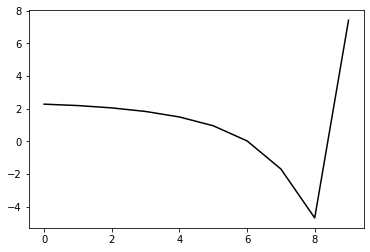

59000 0.3048758407578657
1.4838351706292225 -1.264472881808777 -0.15384419109137693 -0.057727158888438525
[ 2.25543423e+00  2.20078297e+00  2.06325916e+00  1.83252494e+00
  1.48247624e+00  9.35455596e-01  5.35634468e-03 -1.71616655e+00
 -4.68582500e+00  7.39988397e+00]


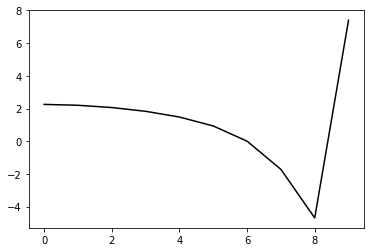

60000 0.22383011884648887
1.4688281273893504 -1.2420652330086615 -0.14159940046683234 -0.0597852737772783
[ 2.27778311  2.19807334  2.04100136  1.81006337  1.47512601  0.94672998
  0.03980247 -1.63097509 -4.46960147  7.43855834]


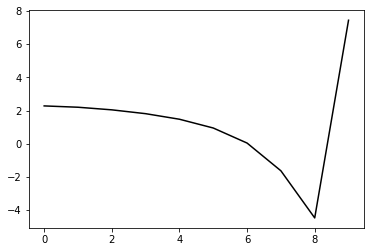

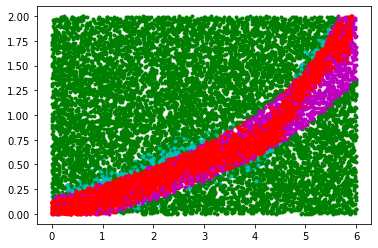

61000 0.17556451849507348
1.4276083944902427 -1.2387595073304776 -0.14110895301596094 -0.060649810136753475
[ 2.21238522  2.21806836  2.09039184  1.86947673  1.52577655  0.98802776
  0.07983231 -1.58442559 -4.38775455  7.47788258]


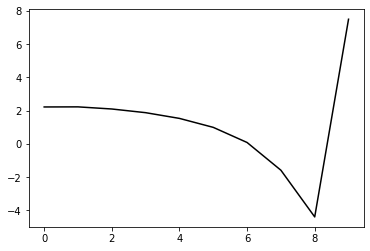

62000 0.1887260039907272
1.382008537497453 -1.2367075333619673 -0.14025170634639766 -0.06162799539996473
[ 2.23324141  2.14420591  2.01056687  1.80230011  1.47927383  0.95784244
  0.05764365 -1.59475866 -4.35047444  7.48710448]


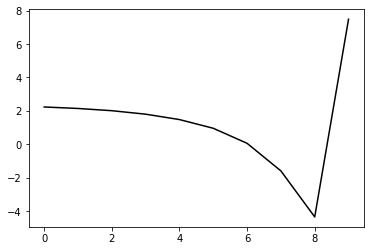

63000 0.2517306145933857
1.313541206799165 -1.2482389775231642 -0.14781919059902285 -0.05600143648398446
[ 2.26054467  2.07080954  1.9232552   1.70276325  1.37187703  0.84797056
 -0.04663274 -1.68961231 -4.41590687  7.46275389]


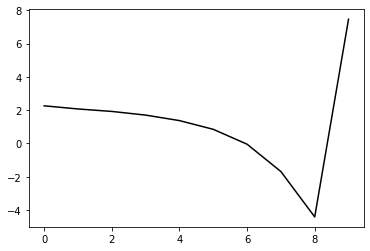

64000 0.2509843315279204
1.3156239694614524 -1.2219411288007833 -0.13611253815077068 -0.06009232252977291
[ 2.2039364   2.14198394  2.01790081  1.82259548  1.51839314  1.02298376
  0.16332709 -1.41636452 -4.00610787  7.51992824]


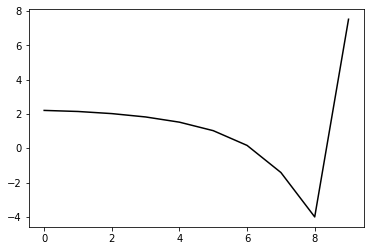

65000 0.25669474621968674
1.2558277158212228 -1.22950274915439 -0.14189760846856944 -0.0559876844698449
[ 2.2086812   2.07522056  1.94995119  1.75251722  1.4463036   0.9491862
  0.0867901  -1.50066904 -4.08663066  7.52559169]


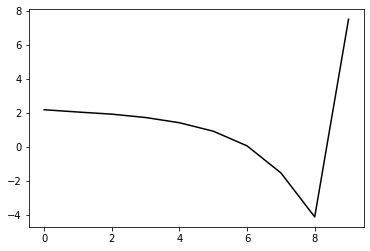

66000 0.3110823521446408
1.2144472598716436 -1.2288564664546051 -0.14418617990652033 -0.05428238233741778
[ 2.16530144  2.08459028  1.964395    1.76163147  1.4440987   0.93992032
  0.08217013 -1.48406655 -4.0114556   7.52592457]


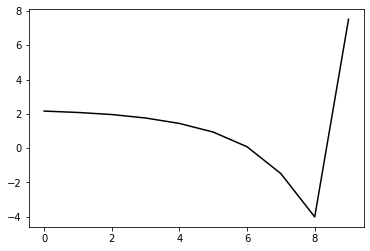

67000 0.20066196631536767
1.1590715975755066 -1.2185653957142184 -0.13896219185363345 -0.05529288239887467
[ 2.18947037  2.09126274  1.90890193  1.6793708   1.35543311  0.85624175
  0.01841445 -1.49506933 -3.91638116  7.5310976 ]


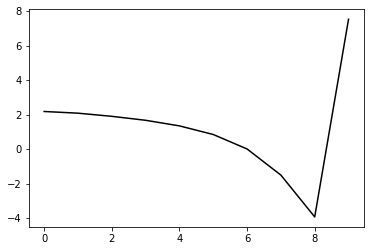

68000 0.2213370396094454
1.1364108069941143 -1.2055067161328485 -0.13607060707677293 -0.05441041389290878
[ 2.23368613  2.02983747  1.89305142  1.68745398  1.38841983  0.91707828
  0.10656102 -1.36960375 -3.72244919  7.57958263]


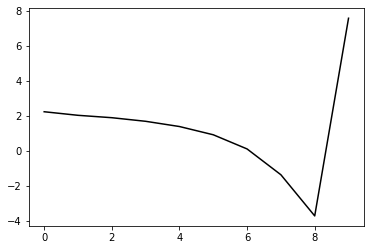

69000 0.2845167415515781
1.0905226386034936 -1.2071008413673403 -0.1394235806467571 -0.05335932843327187
[ 2.12571572  2.05163824  1.94122738  1.75764876  1.45717316  0.96677597
  0.13448271 -1.35188852 -3.66208797  7.57257367]


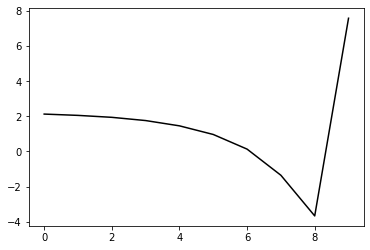

70000 0.2489088948547038
1.073163560552857 -1.1823103090548208 -0.12867288700981977 -0.059436513126270095
[ 2.10848388  2.07273809  1.96816661  1.78463744  1.4934272   1.01516685
  0.19038677 -1.2921858  -3.55962239  7.62705516]


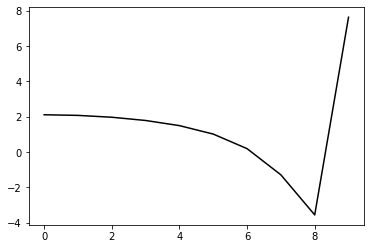

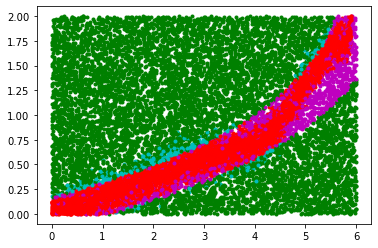

71000 0.17170254713322874
1.0490563666300539 -1.1742194681267086 -0.12787458314189418 -0.0571322706749187
[ 2.09615973  2.06563962  1.96263178  1.79096235  1.51506556  1.0646598
  0.29170857 -1.1138712  -3.27239349  7.66750734]


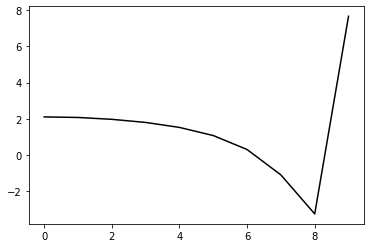

72000 0.21594740485731984
1.0126994810598369 -1.1694976661197718 -0.12840459409140179 -0.0547627198339952
[ 2.09005978  2.03924573  1.9286415   1.7511217   1.48662676  1.06426184
  0.33004393 -1.01779183 -3.08433933  7.70113795]


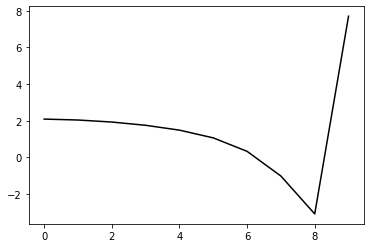

73000 0.1550052458840015
0.9830865674010859 -1.1658256772110664 -0.13080760945269196 -0.05611463740446381
[ 2.05872289  2.04702991  1.95783897  1.79527254  1.53062849  1.09544755
  0.34762046 -0.99981194 -3.04254963  7.75103461]


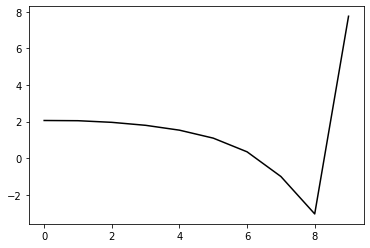

74000 0.16217793952422518
0.9628642248897425 -1.1504302275996947 -0.12527479409122044 -0.055087202834281444
[ 2.02129998  2.07840663  1.97944885  1.79873278  1.50433037  1.04864191
  0.30317476 -1.01154863 -2.96910904  7.73881024]


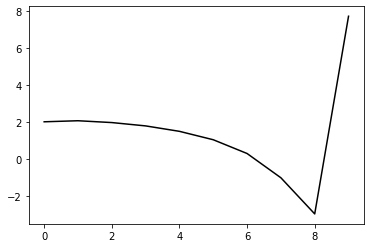

75000 0.2586597607292466
0.9263475834231938 -1.148462391591759 -0.12933950777107162 -0.054070479628311574
[ 2.06092515  2.01960778  1.92207076  1.75378395  1.48626498  1.06064679
  0.3439326  -0.93081231 -2.79633742  7.74564639]


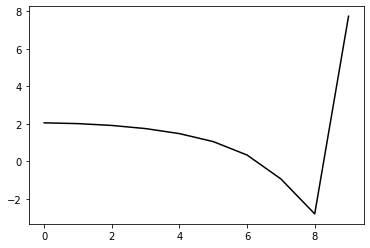

76000 0.2572238580696583
0.89757900098191 -1.1417123761953498 -0.12925643639886727 -0.05298862023558879
[ 2.06134549  2.04536627  1.95337049  1.78743785  1.51985734  1.09851746
  0.40325571 -0.8147435  -2.56132372  7.77435933]


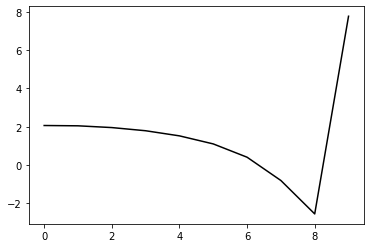

77000 0.22345750247585008
0.8621481270639684 -1.1348198623649417 -0.12835767577460253 -0.050488042129847796
[ 2.01536288  1.99045444  1.88591551  1.70932191  1.43060993  0.99044397
  0.26757268 -0.96491272 -2.66437701  7.7372441 ]


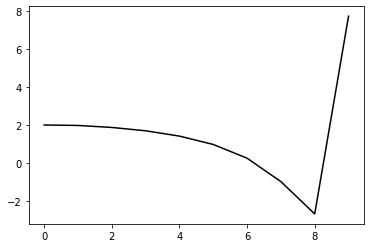

78000 0.27636004968486116
0.8369007047443847 -1.1320587384422445 -0.13023734547346347 -0.05271218650922418
[ 2.00201935  1.97219368  1.88219638  1.7135582   1.43609026  1.00476734
  0.30212816 -0.89844524 -2.5105777   7.77437823]


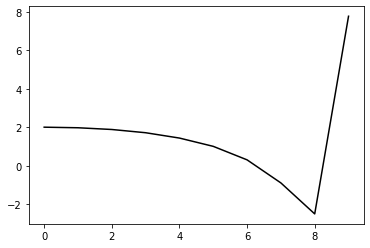

79000 0.20426492173568783
0.8157228429935138 -1.1164850501222765 -0.12426781826249549 -0.055068485025195395
[ 1.96919138  1.95948753  1.8714838   1.69678788  1.42262758  0.99747766
  0.30087343 -0.87841573 -2.41877416  7.84250916]


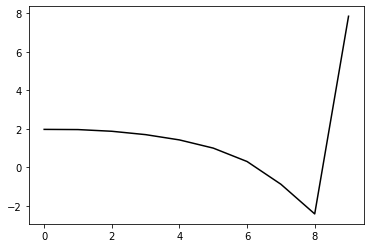

80000 0.23171819228676852
0.7852194506202238 -1.1125604066574957 -0.12419234474709673 -0.054046588016494194
[ 1.97440869  1.93175353  1.83993084  1.69051542  1.4443902   1.04694892
  0.38683133 -0.74771317 -2.21067582  7.85262563]


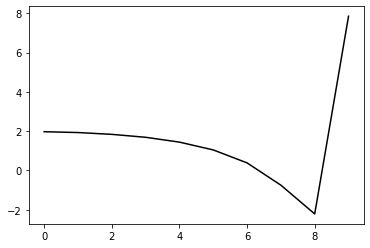

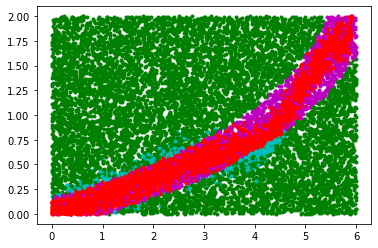

81000 0.2401475214981886
0.7624832018663936 -1.1074498615560375 -0.12573092487261264 -0.05417870766436819
[ 1.93969906  1.89666593  1.81538012  1.66169525  1.39798359  0.98383604
  0.31771455 -0.79893372 -2.20764317  7.83160764]


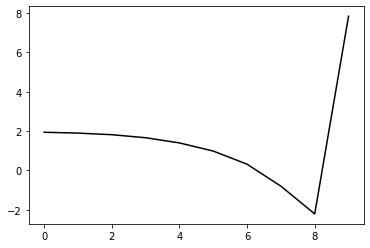

82000 0.19537015344599612
0.7364095122026325 -1.0941150470463754 -0.12009974153882638 -0.055671387413974205
[ 1.95334909  1.92464783  1.8183418   1.64915898  1.39013317  0.99282201
  0.34810789 -0.73692866 -2.08410279  7.88171115]


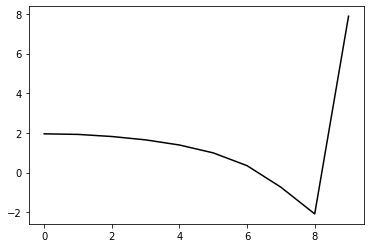

83000 0.2334068181205281
0.7177581065789 -1.0895451937041225 -0.12377896312373797 -0.05303392976559419
[ 1.92072053  1.92215434  1.84034464  1.69180431  1.44689141  1.06240304
  0.43788417 -0.61113058 -1.89680951  7.90640636]


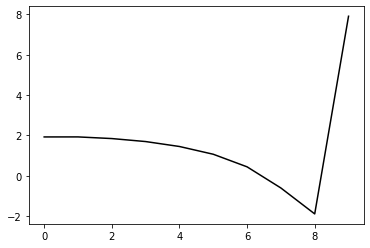

84000 0.17206312637152493
0.7107732662945014 -1.0750105752708636 -0.12266850692126004 -0.05657449973774269
[ 1.87817192  1.86015833  1.78874771  1.65242197  1.4063945   0.99951002
  0.32861308 -0.76573525 -2.06500726  7.86592404]


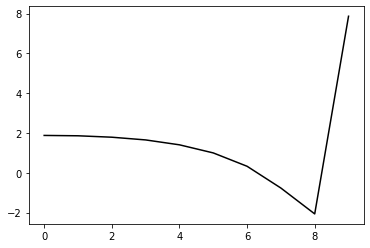

85000 0.21037815821157427
0.6934793834480589 -1.063531784474224 -0.11909169548184793 -0.05739529208977468
[ 1.90655565  1.87095035  1.76832299  1.60578951  1.35601062  0.96726115
  0.33910595 -0.71102485 -1.94682133  7.91592499]


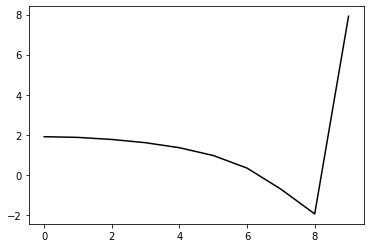

86000 0.1792875414364888
0.6670651628054252 -1.0588316456050093 -0.12166310511190491 -0.05631203790233265
[ 1.86893307  1.83660457  1.72889722  1.56884146  1.32846671  0.95659421
  0.35904106 -0.63049348 -1.78222921  7.91363092]


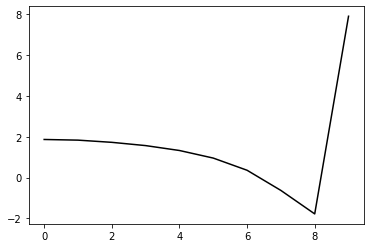

87000 0.3056108082276228
0.6535668825994012 -1.0462161217233135 -0.11965311123925393 -0.05403420141095707
[ 1.82853934  1.81933543  1.74710967  1.59824358  1.35910656  0.99117095
  0.40271662 -0.55607424 -1.62974431  7.99135065]


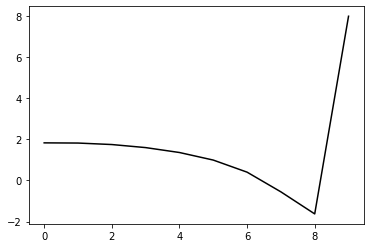

88000 0.2667494685878085
0.6206646818672854 -1.0417842928223189 -0.11999323891036692 -0.05881286797432763
[ 1.86553324  1.84124067  1.72424119  1.52861015  1.25110459  0.85706475
  0.25309265 -0.70464162 -1.73151315  7.93208475]


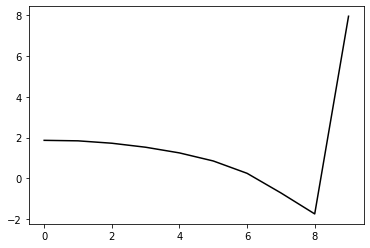

89000 0.2786078639906191
0.6072627732396765 -1.03768134227121 -0.1260843194412873 -0.053664195046852464
[ 1.83489358  1.73873217  1.63270746  1.48312564  1.24091902  0.84962607
  0.22631133 -0.74894548 -1.76277206  7.92468813]


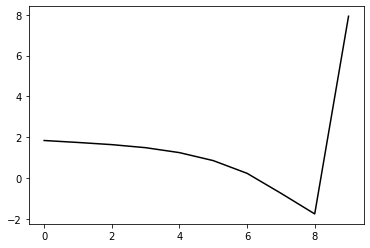

90000 0.314218253923297
0.6024083801915734 -1.020836136349525 -0.12198119324290614 -0.05190548473972187
[ 1.79498032  1.74862061  1.67267149  1.52909996  1.28855533  0.91178202
  0.32115008 -0.6218488  -1.59364775  7.95639   ]


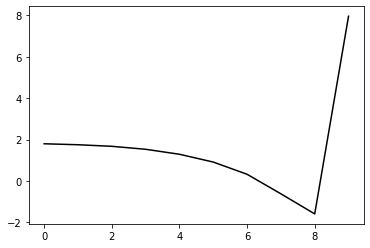

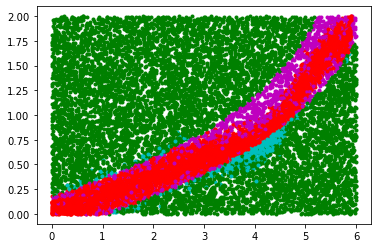

91000 0.2802505440810784
0.5841977320990767 -1.0097258291217457 -0.11874663475389217 -0.060557254210723326
[ 1.7918523   1.74360042  1.62890319  1.45631862  1.19494219  0.80639356
  0.21185034 -0.71070914 -1.62776053  7.96551802]


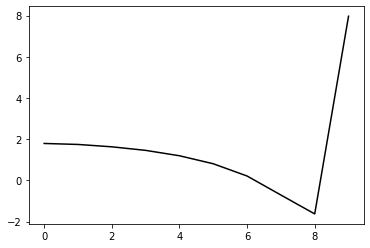

92000 0.24946422160260404
0.5741333993153918 -0.9970906884367274 -0.1198003598688266 -0.05611280856263961
[ 1.77295183  1.79685088  1.69850918  1.53640285  1.2897098   0.92423286
  0.35847637 -0.53396075 -1.41023241  8.00831811]


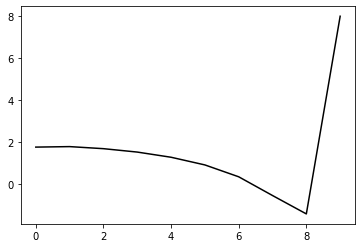

93000 0.17970106508919081
0.5635419125468182 -0.9895160193787033 -0.12166600014954448 -0.05706387262289033
[ 1.75360933  1.75309543  1.67026642  1.52397794  1.28828492  0.92416229
  0.3557173  -0.52835355 -1.37153473  7.98753319]


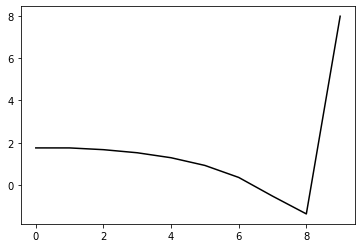

94000 0.5727849931382472
0.5318128587020456 -0.9935525538243715 -0.12810755697541334 -0.04692803129155666
[ 1.7458469   1.67967343  1.53334116  1.34227397  1.08128753  0.72162875
  0.18579102 -0.65394407 -1.45060356  7.96801569]


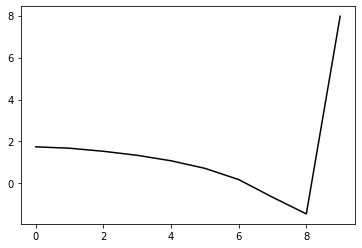

95000 0.3213076783453559
0.5274870881100545 -0.9770640381235802 -0.12427022926750811 -0.05492305034535803
[ 1.75381793  1.66916883  1.59790796  1.47547475  1.25041819  0.89453144
  0.34297265 -0.49935773 -1.26942692  8.03086026]


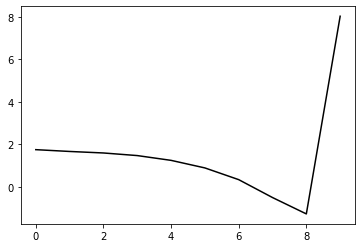

96000 0.22643648070910513
0.5137052734455654 -0.9617089905090079 -0.11875512877028162 -0.055272994342791155
[ 1.73422032  1.77681835  1.68638433  1.54282835  1.31958389  0.97169302
  0.43211441 -0.39621139 -1.14489503  8.04463419]


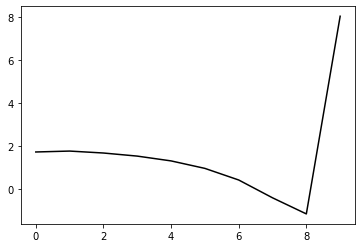

97000 0.22788614787897996
0.4929652894123169 -0.9603124013184823 -0.12427472846604438 -0.05559144249524498
[ 1.73933812  1.57492636  1.42697662  1.23373623  0.99107812  0.64411617
  0.10734572 -0.71875182 -1.44516201  7.98934063]


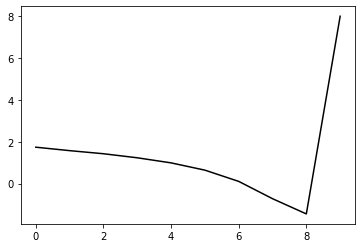

98000 0.18752870755123327
0.4965168465064841 -0.9385887865565558 -0.1174197278013936 -0.05947645485841959
[ 1.62871328  1.67372972  1.6081183   1.46962746  1.24135048  0.8970822
  0.36038004 -0.46064593 -1.16679125  8.05568344]


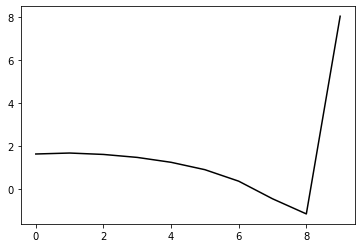

99000 0.24407900785939265
0.48103539653402444 -0.9336723194054455 -0.12021383615731547 -0.05381287274006208
[ 1.63085431  1.5883497   1.53103718  1.40656609  1.19356016  0.86089637
  0.3511974  -0.42880764 -1.09743307  8.02665413]


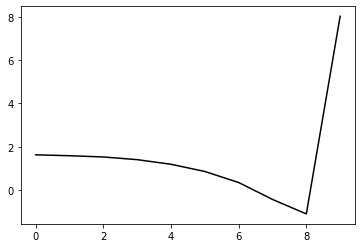

In [37]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.41589771688242305
0.4700675540932472 -0.9333032327177962 -0.12475244903504612 -0.050715299763874705
[ 1.65738807  1.68331141  1.59036099  1.33666268  1.11544559  0.8039483
  0.32897009 -0.4040541  -1.00220763  8.11248303]


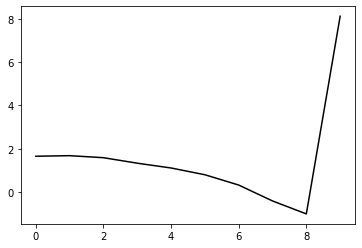

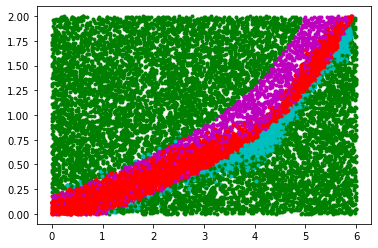

KeyboardInterrupt: 

In [38]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

In [ ]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

In [ ]:
print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
plt.plot(h.numpy(), 'k-'), plt.show()